In [1]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

def calculate_metrics(true_values, pred_values):
    mse = round(mean_squared_error(true_values, pred_values),3)
    mae = round(mean_absolute_error(true_values, pred_values),3)
    r_score = round(r2_score(true_values, pred_values),3)

    return {"mse": mse,
            "mae": mae,
            "r_score": r_score,}

In [2]:
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

TRAIN_CSV_PATH = r''

# Import a sample binary outcome train/test set into H2O
train = h2o.import_file(r"C:\work\DrugDiscovery\main_git\XAI_Chem\data\H2O_Auto_ML_cv_5\train_pKa_data.csv")
test = h2o.import_file(r"C:\work\DrugDiscovery\main_git\XAI_Chem\data\H2O_Auto_ML_cv_5\test_pKa_data.csv")

# Identify predictors and response
x = train.columns
x.remove('C1')
y = "pKa"
x.remove(y)

aml = H2OAutoML(seed=1, max_runtime_secs_per_model=300)
aml.train(x=x, y=y, training_frame=train, leaderboard_frame=test, fold_column="fold_id")

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 21.0.1+12-LTS-29, mixed mode, sharing)
  Starting server from C:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\38066\AppData\Local\Temp\tmpzlun8zvo
  JVM stdout: C:\Users\38066\AppData\Local\Temp\tmpzlun8zvo\h2o_38066_started_from_python.out
  JVM stderr: C:\Users\38066\AppData\Local\Temp\tmpzlun8zvo\h2o_38066_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Kiev
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,"28 days, 4 hours and 25 minutes"
H2O_cluster_name:,H2O_from_python_38066_8gfihm
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.952 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:57:44.819: Fold column fold_id will be used for cross-validation. nfolds parameter will be ignored.
20:57:44.832: AutoML: XGBoost is not available; skipping it.
20:57:44.874: _train param, Dropping bad and constant columns: [naRing, dihedral_angle_=O, naHRing, nFaHRing, dihedral_angle_non-F, nFaRing]


20:57:45.370: _train param, Dropping bad and constant columns: [naRing, dihedral_angle_=O, naHRing, nFaHRing, dihedral_angle_non-F, nFaRing]
20:57:45.376: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 139.0.
20:57:45.380: _train param, Dropping bad and constant columns: [naRing, dihedral_angle_=O, naHRing, nFaHRing, dihedral_angle_non-F, nFaRing]

█
20:57:46.201: _train param, Dropping bad and c

deeplearning prediction progress: |

██████████████████████████████████████████████| (done) 100%


c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Text(0.5, 0, 'Percent')

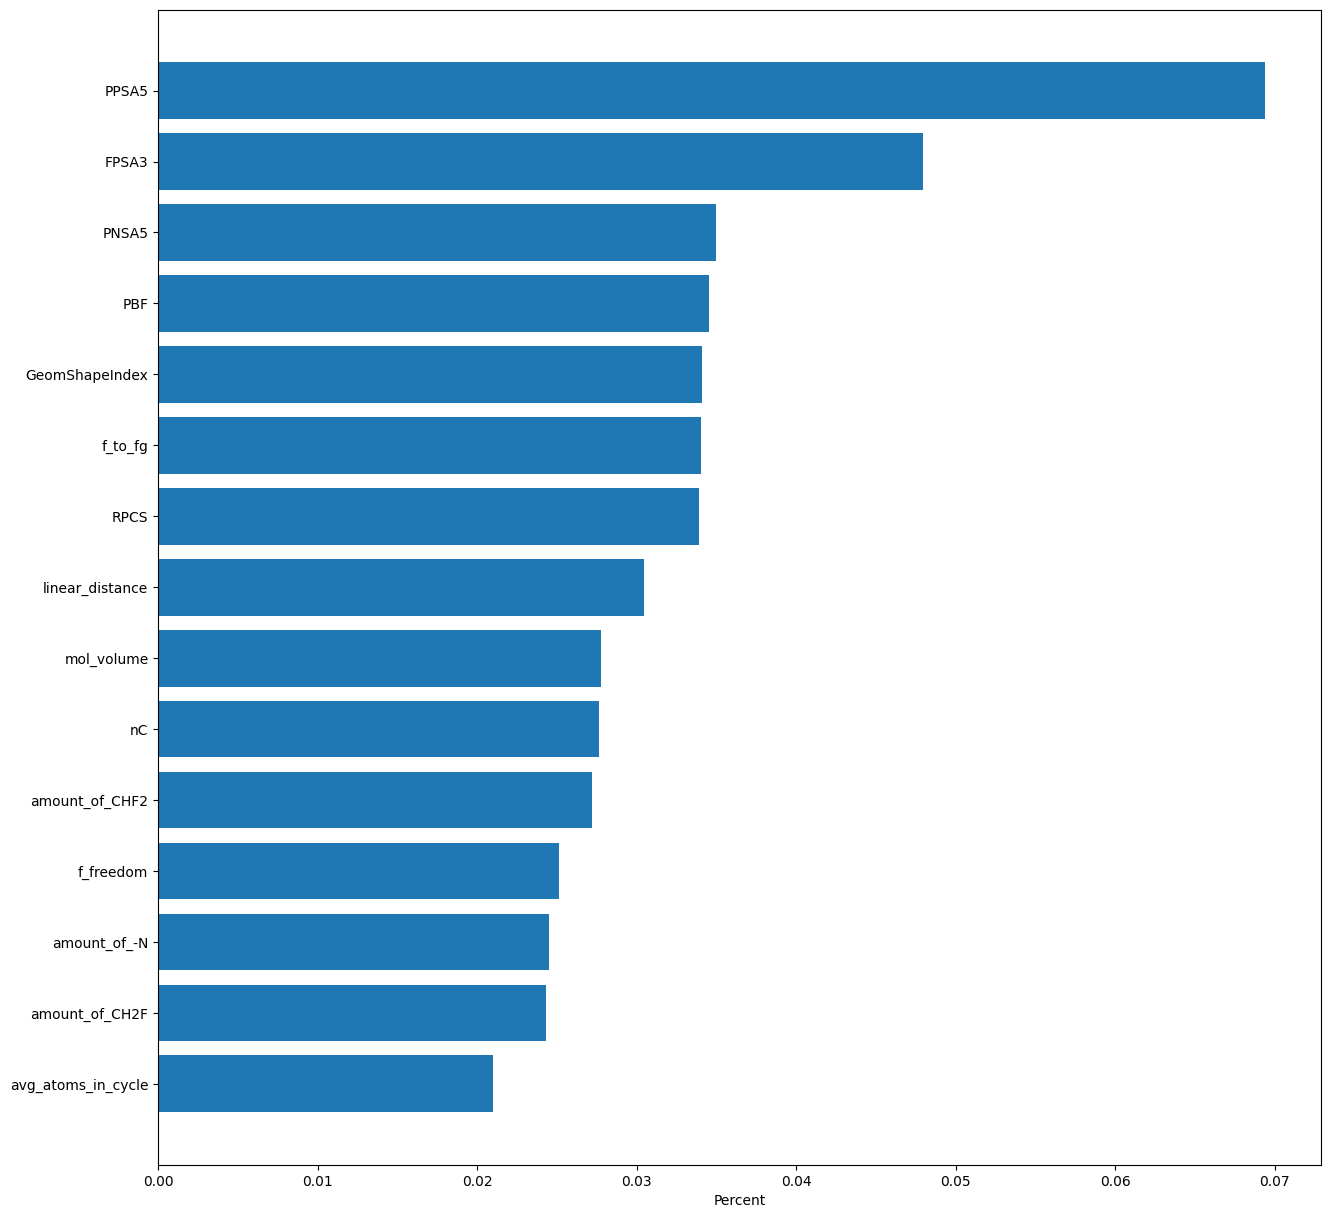

In [15]:
import matplotlib.pyplot as plt

MODEL_PATH = r'C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part\h2o_model\models\pKa\best_model\DeepLearning_grid_1_AutoML_4_20240116_184133_model_137'
pKa_model = h2o.load_model(MODEL_PATH)

preds = pKa_model.predict(test)
true = test.as_data_frame()['pKa']
predicted_values = preds.as_data_frame()['predict']

calculate_metrics(true, predicted_values)

importance = pKa_model.varimp(test)

fig, ax = plt.subplots(figsize=(15, 15))
ax.barh(importance['variable'][:15][::-1], importance['percentage'][:15][::-1])
ax.set_xlabel('Percent')


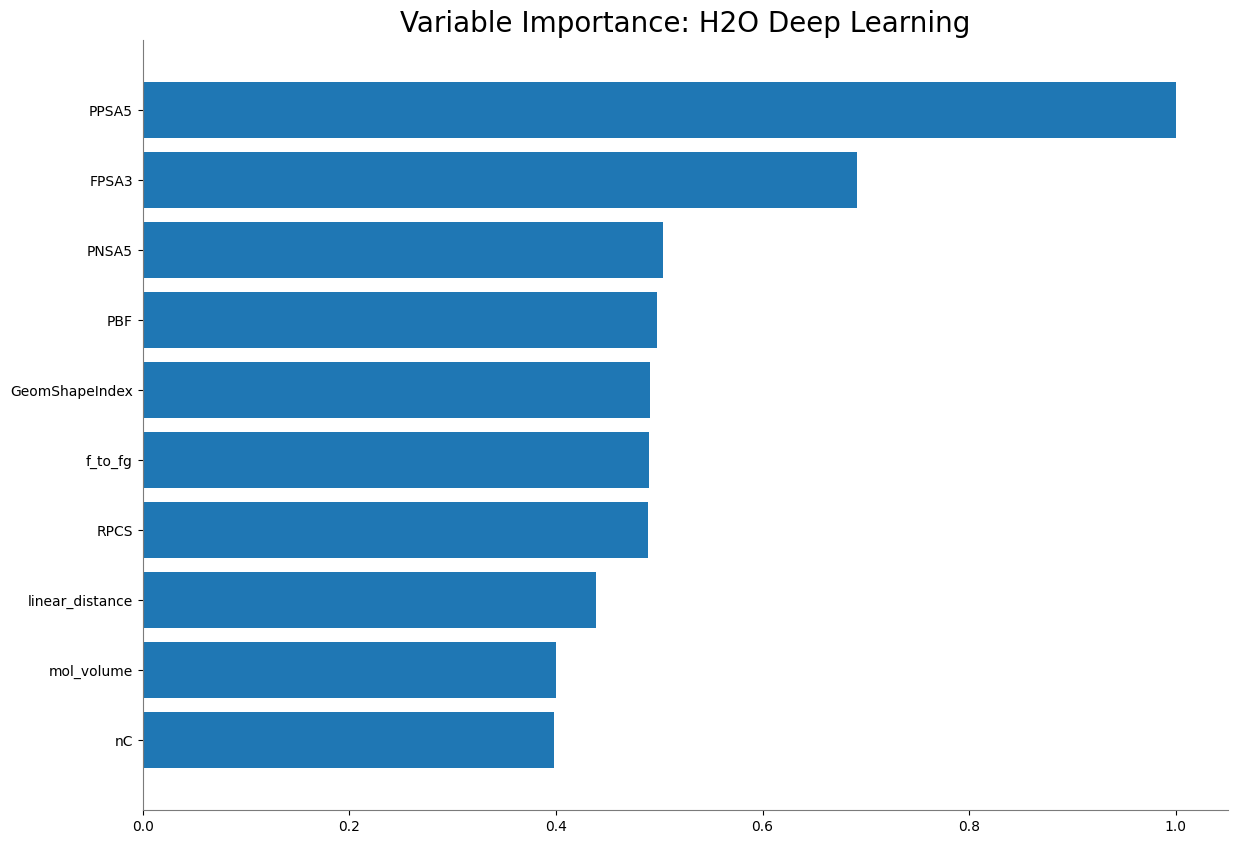

<Figure size 640x480 with 0 Axes>

In [13]:
pKa_model.varimp_plot()

In [3]:
preds = aml.predict(test)
true = test.as_data_frame()['pKa']
predicted_values = preds.as_data_frame()['predict']

calculate_metrics(true, predicted_values)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'mse': 0.392, 'mae': 0.478, 'r_score': 0.937}

In [40]:
preds = aml.predict(test)
true = test.as_data_frame()['pKa']
predicted_values = preds.as_data_frame()['predict']

calculate_metrics(true, predicted_values)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'mse': 0.34, 'mae': 0.486, 'r_score': 0.946}

In [4]:
best_model = h2o.get_model('StackedEnsemble_BestOfFamily_6_AutoML_1_20240117_205744')

preds = best_model.predict(test)
true = test.as_data_frame()['pKa']
predicted_values = preds.as_data_frame()['predict']

calculate_metrics(true, predicted_values)

stackedensemble prediction progress: |

███████████████████████████████████████████| (done) 100%


c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'mse': 0.393, 'mae': 0.484, 'r_score': 0.937}

SAVE_MODELS

In [5]:
import os

MODEL_SAVE_PATH = r'C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part\h2o_model\models\pKa'

best_model = aml.get_best_model()

model_path = h2o.save_model(model=best_model, path=os.path.join(MODEL_SAVE_PATH, 'best_model'), force=True)
model_path

'C:\\work\\DrugDiscovery\\main_git\\XAI_Chem\\ml_part\\h2o_model\\models\\pKa\\best_model\\DeepLearning_grid_1_AutoML_4_20240116_184133_model_137'

In [6]:
import os

MODEL_SAVE_PATH = r'C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part\h2o_model\models\pKa'

best_model = h2o.get_model('GBM_grid_1_AutoML_4_20240116_184133_model_161')

model_path = h2o.save_model(model=best_model, path=os.path.join(MODEL_SAVE_PATH, 'gbm_for_eai'), force=True)
model_path

'C:\\work\\DrugDiscovery\\main_git\\XAI_Chem\\ml_part\\h2o_model\\models\\pKa\\gbm_for_eai\\GBM_grid_1_AutoML_4_20240116_184133_model_161'

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

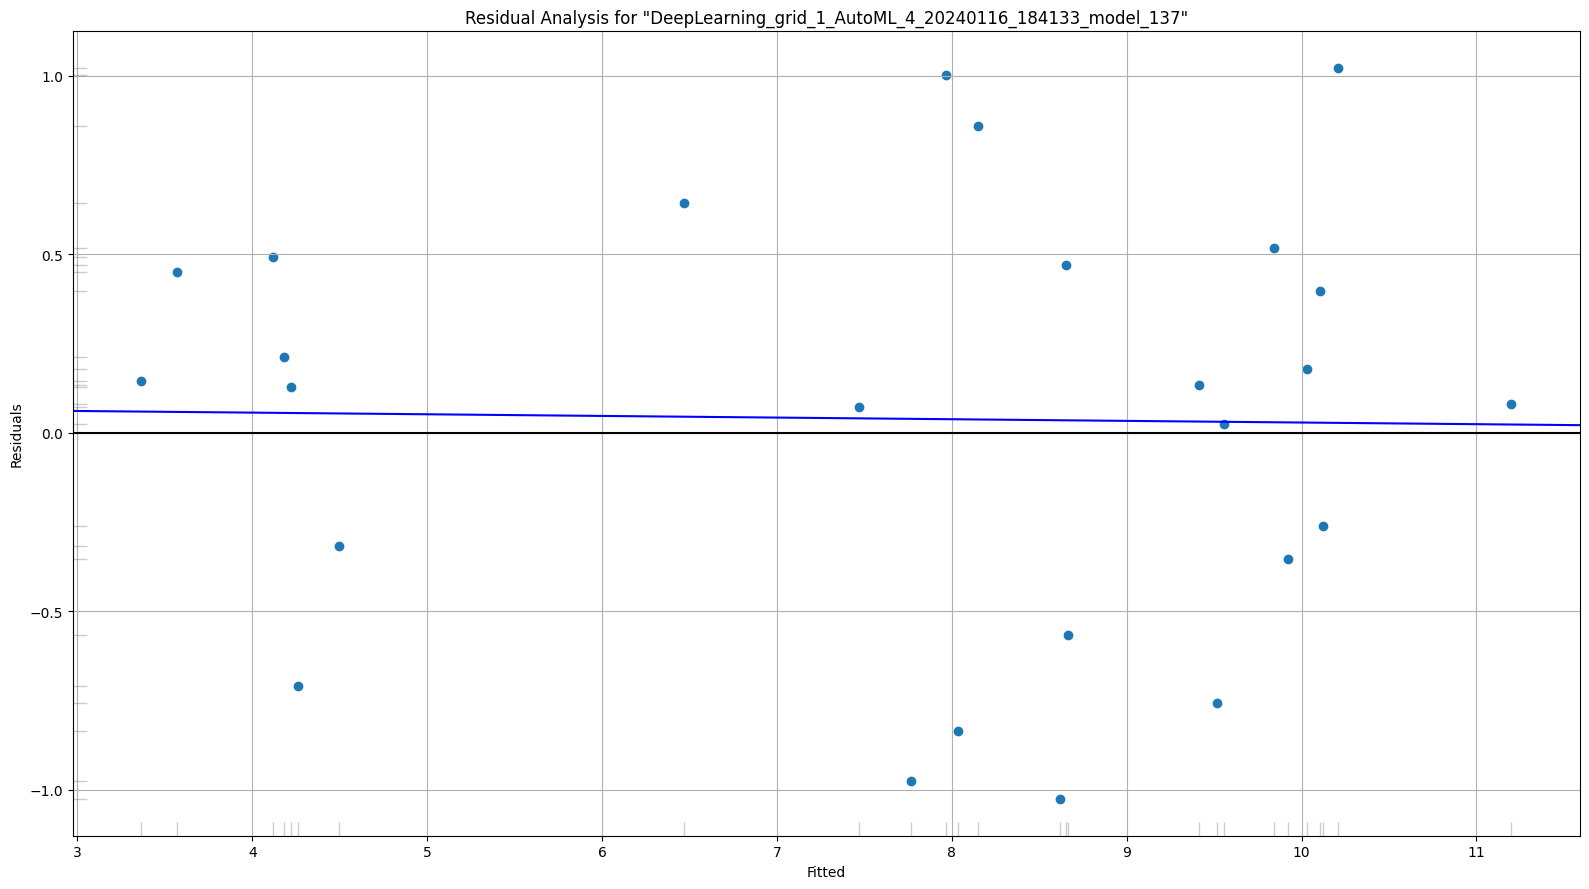

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

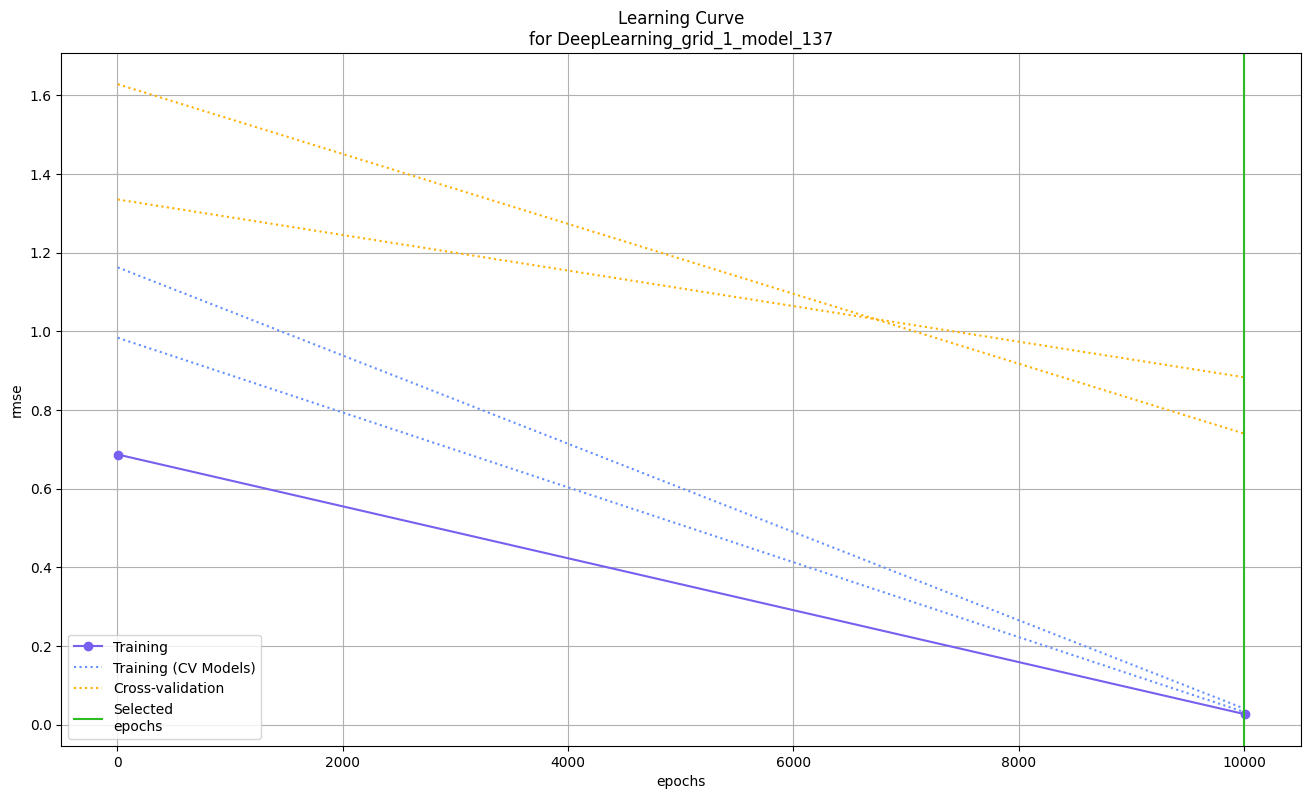

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

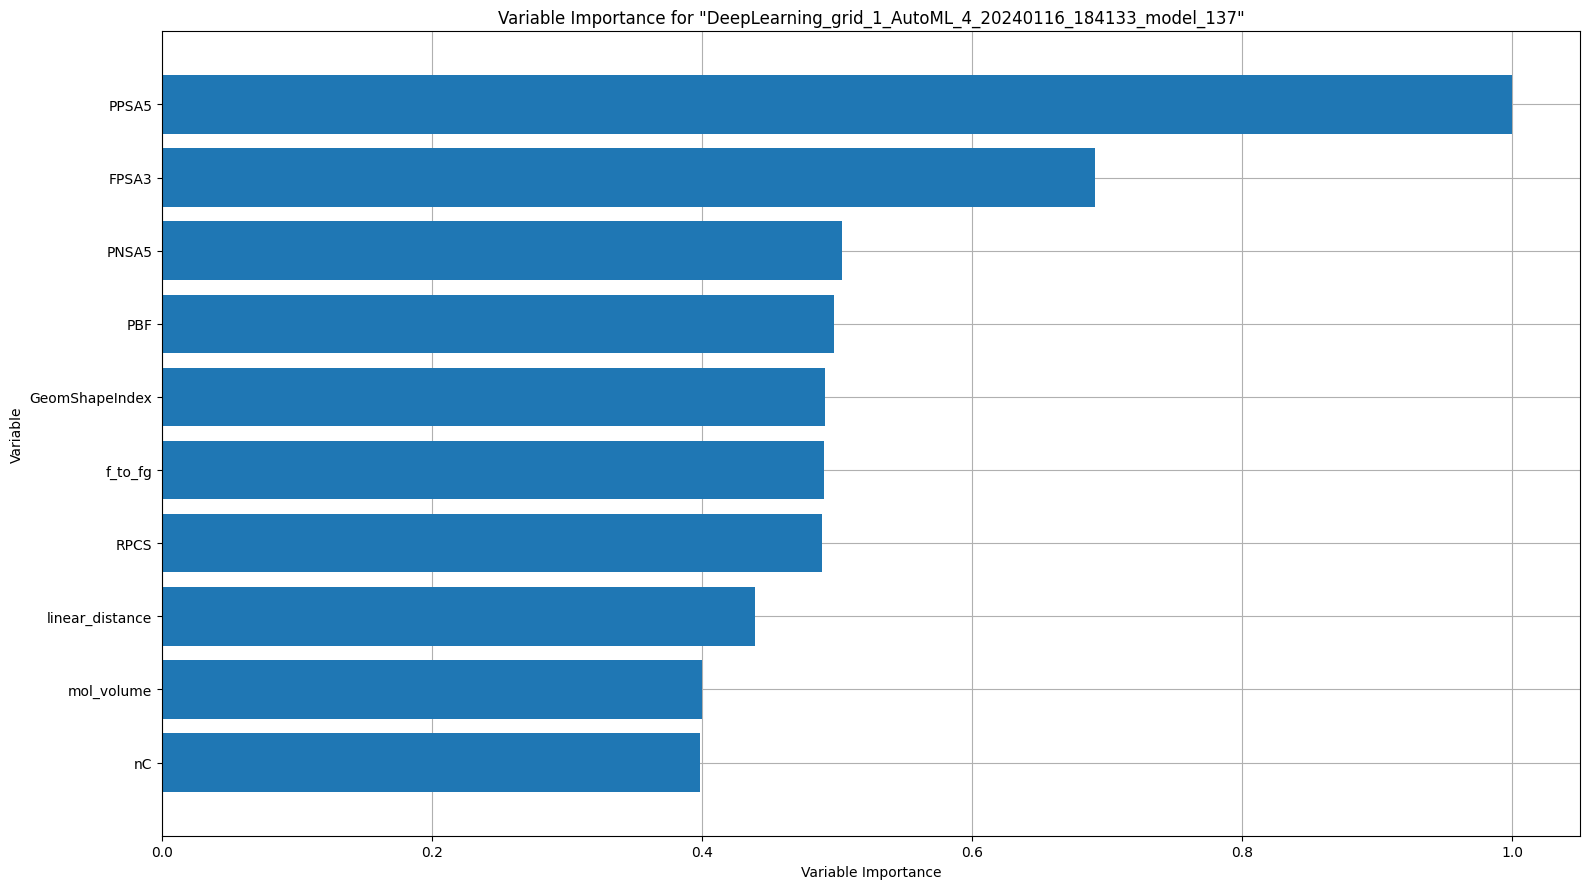

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

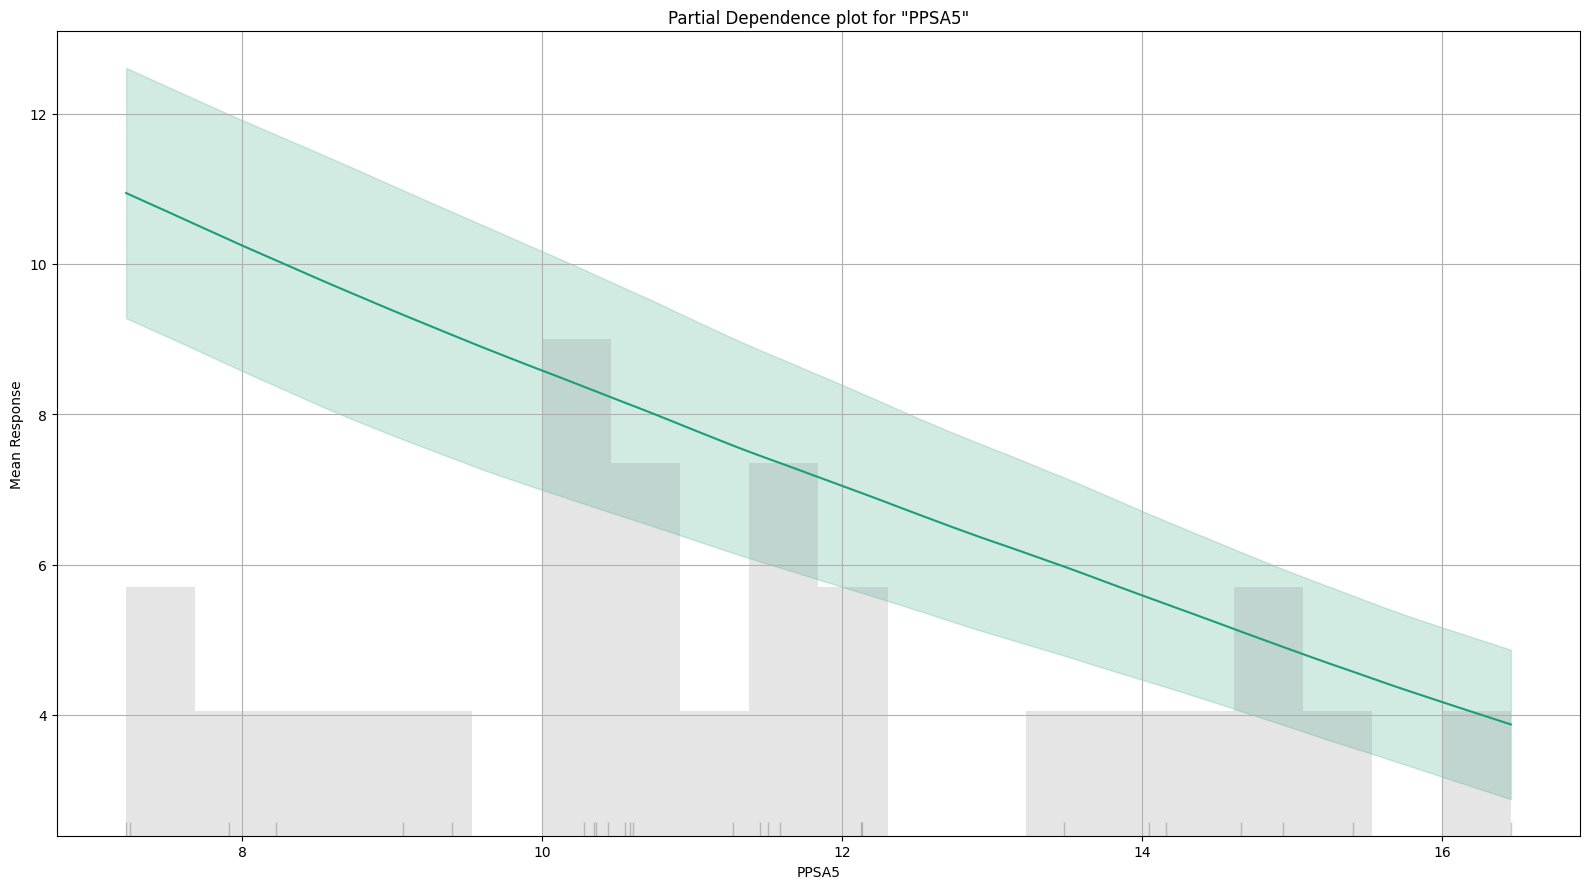

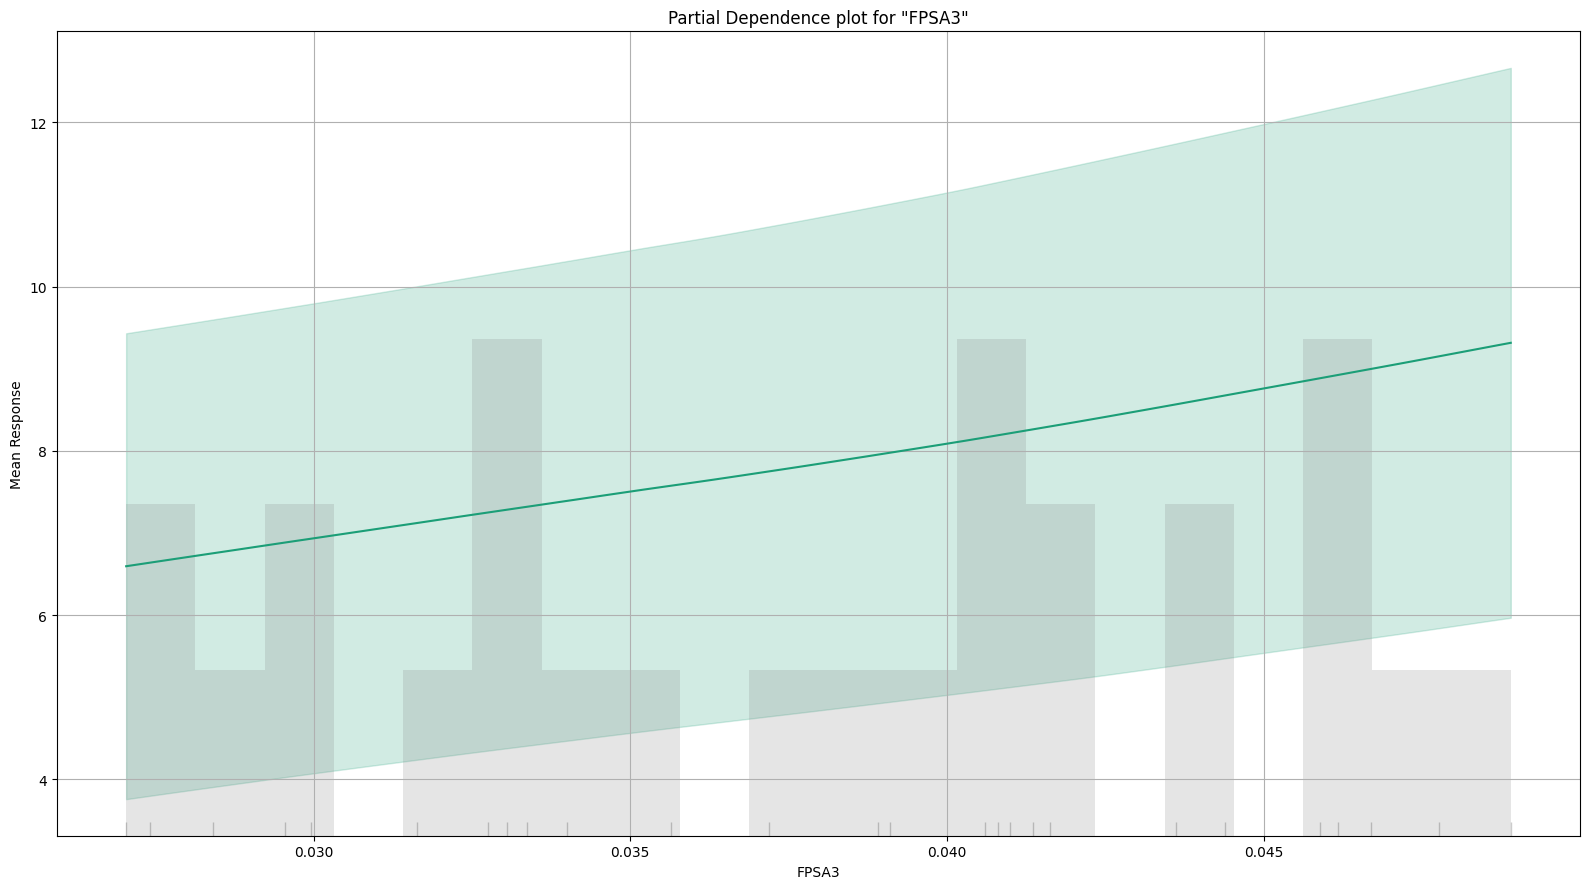

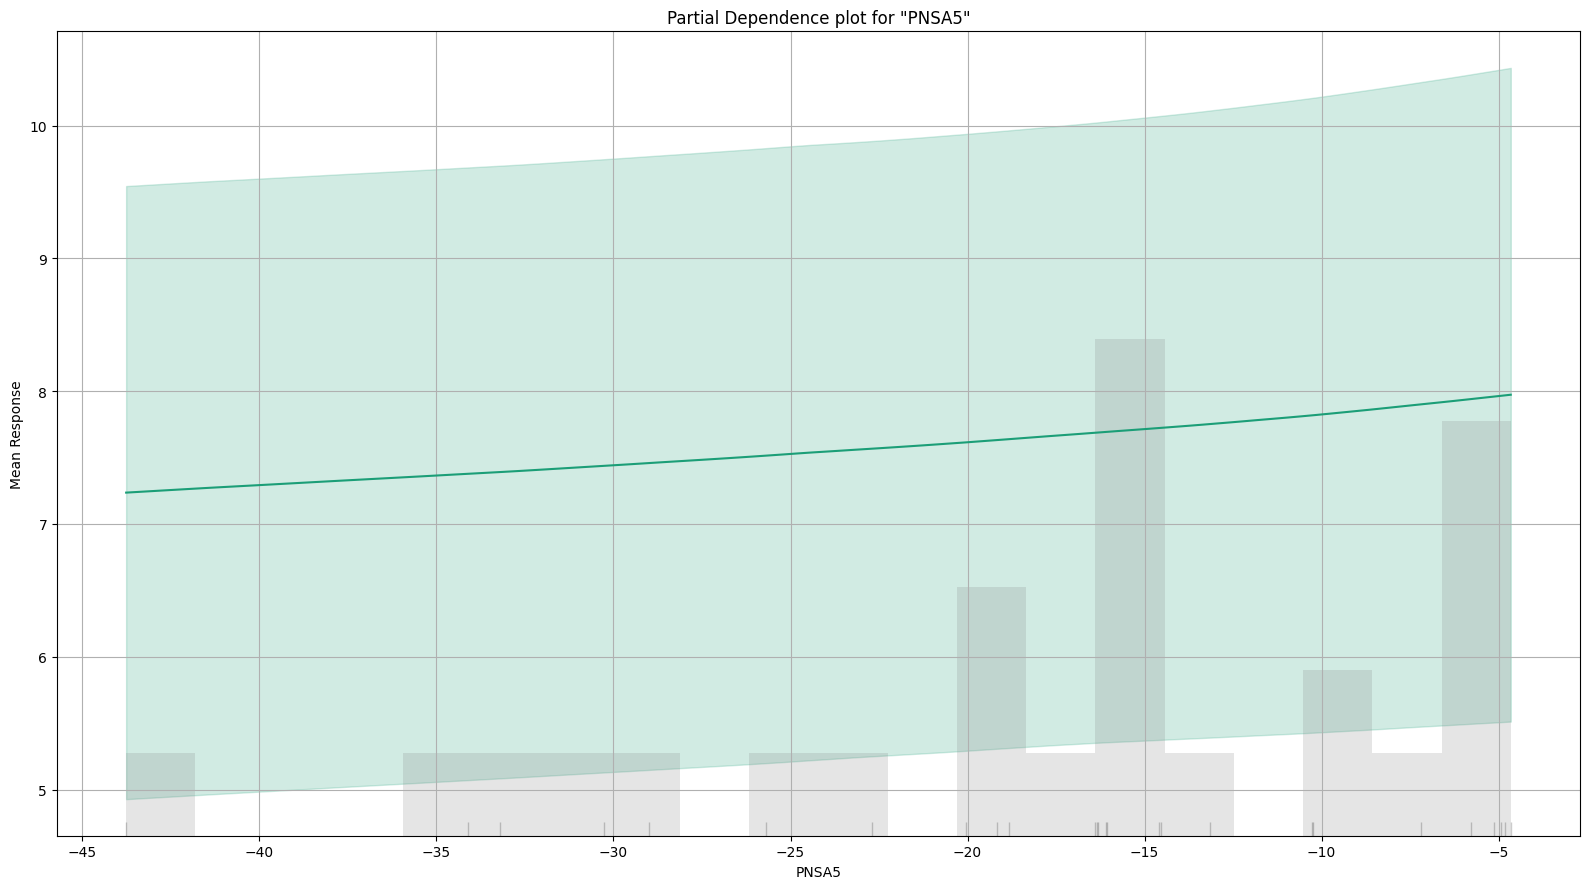

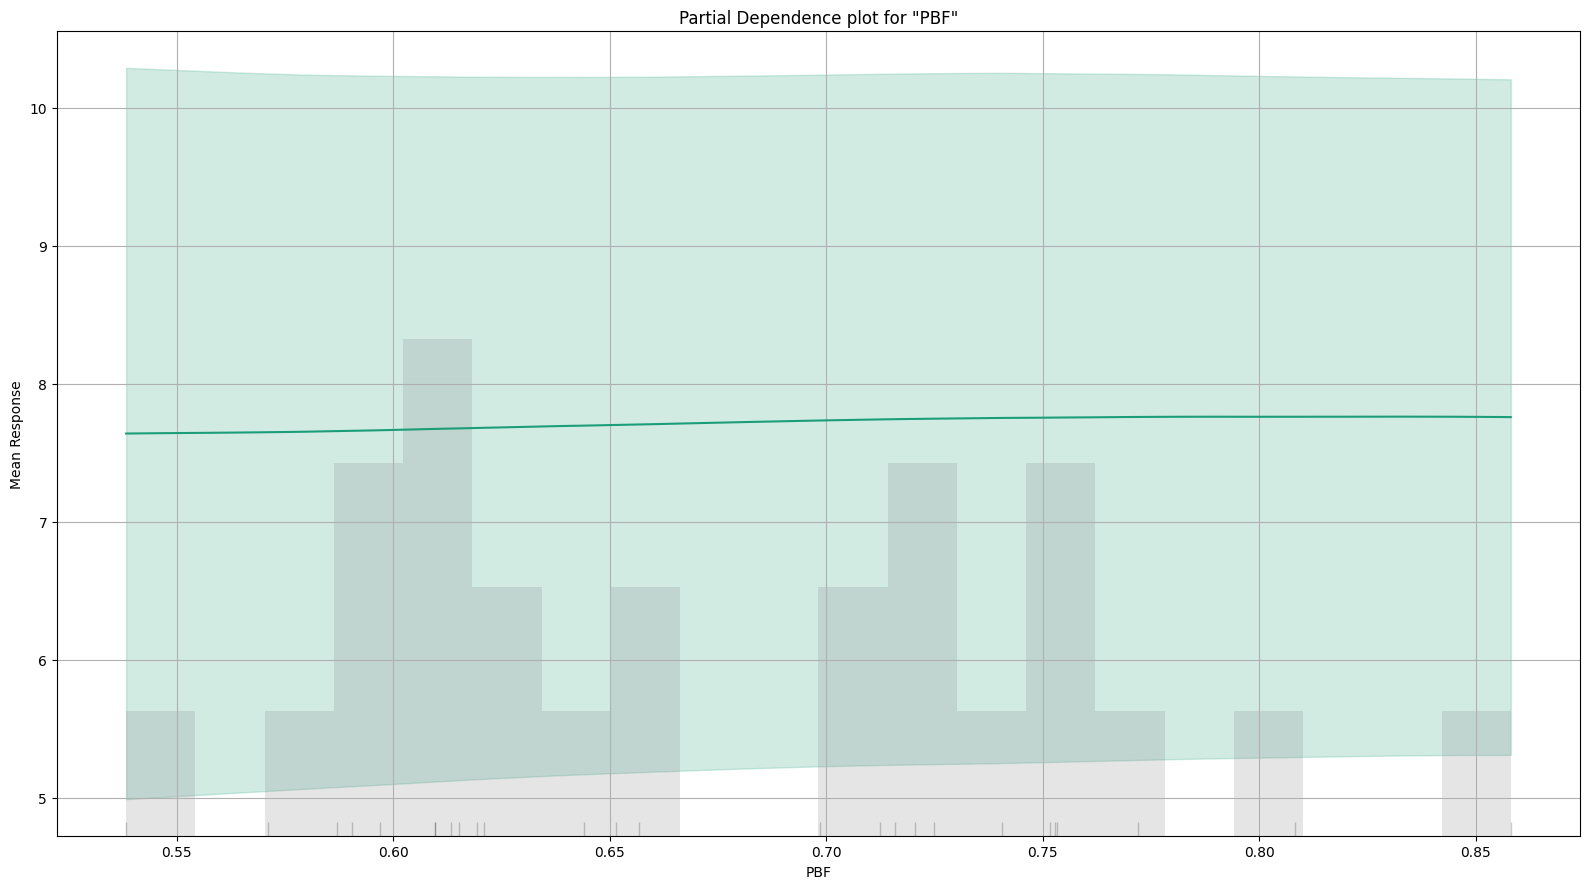

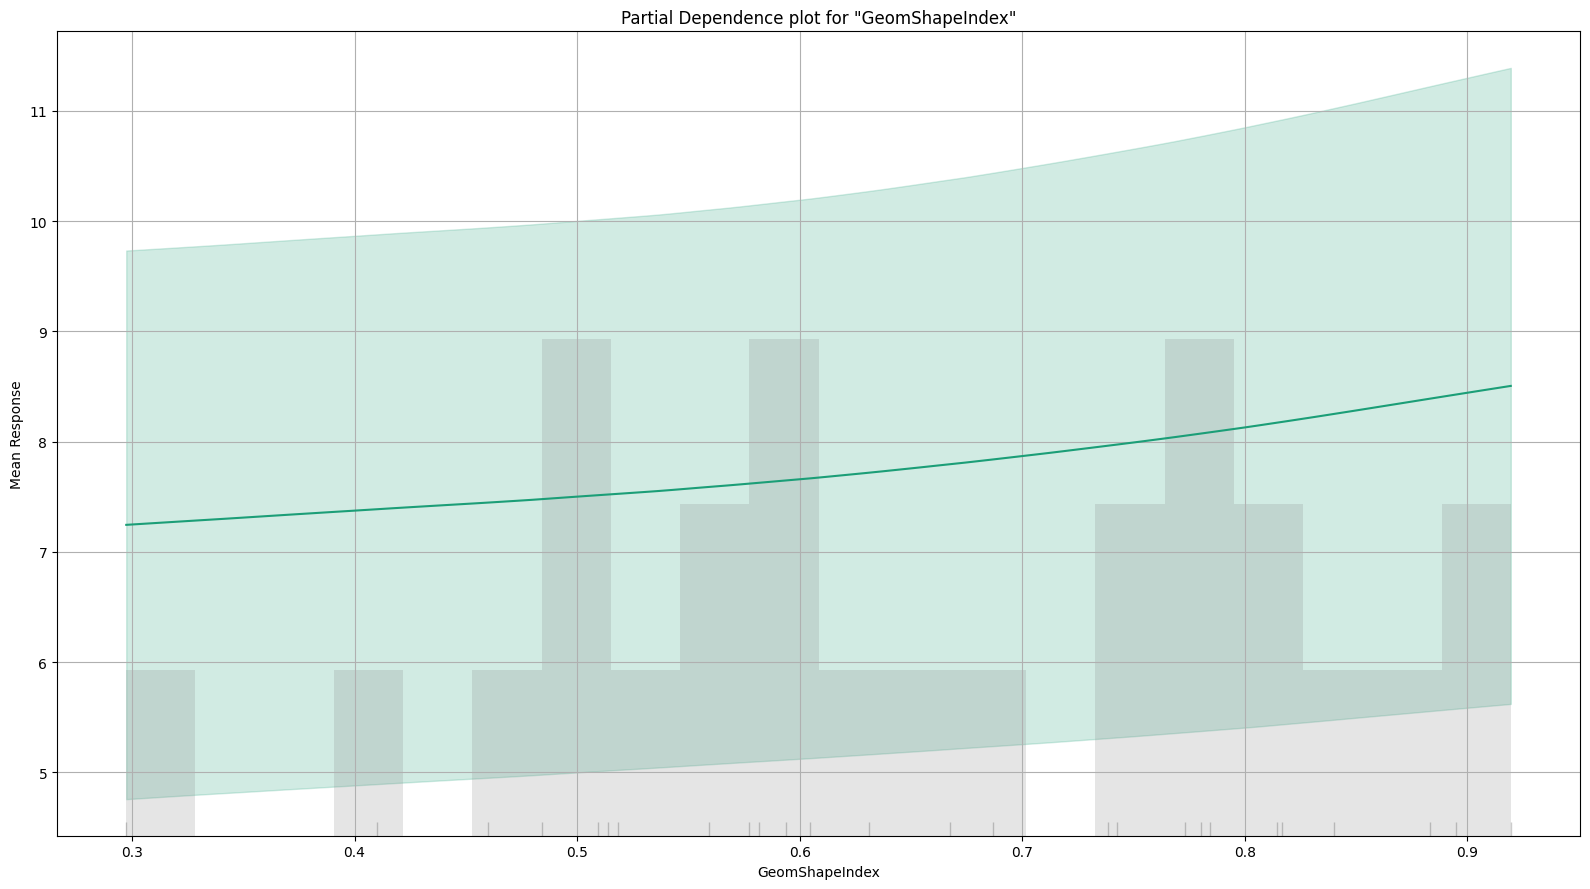

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

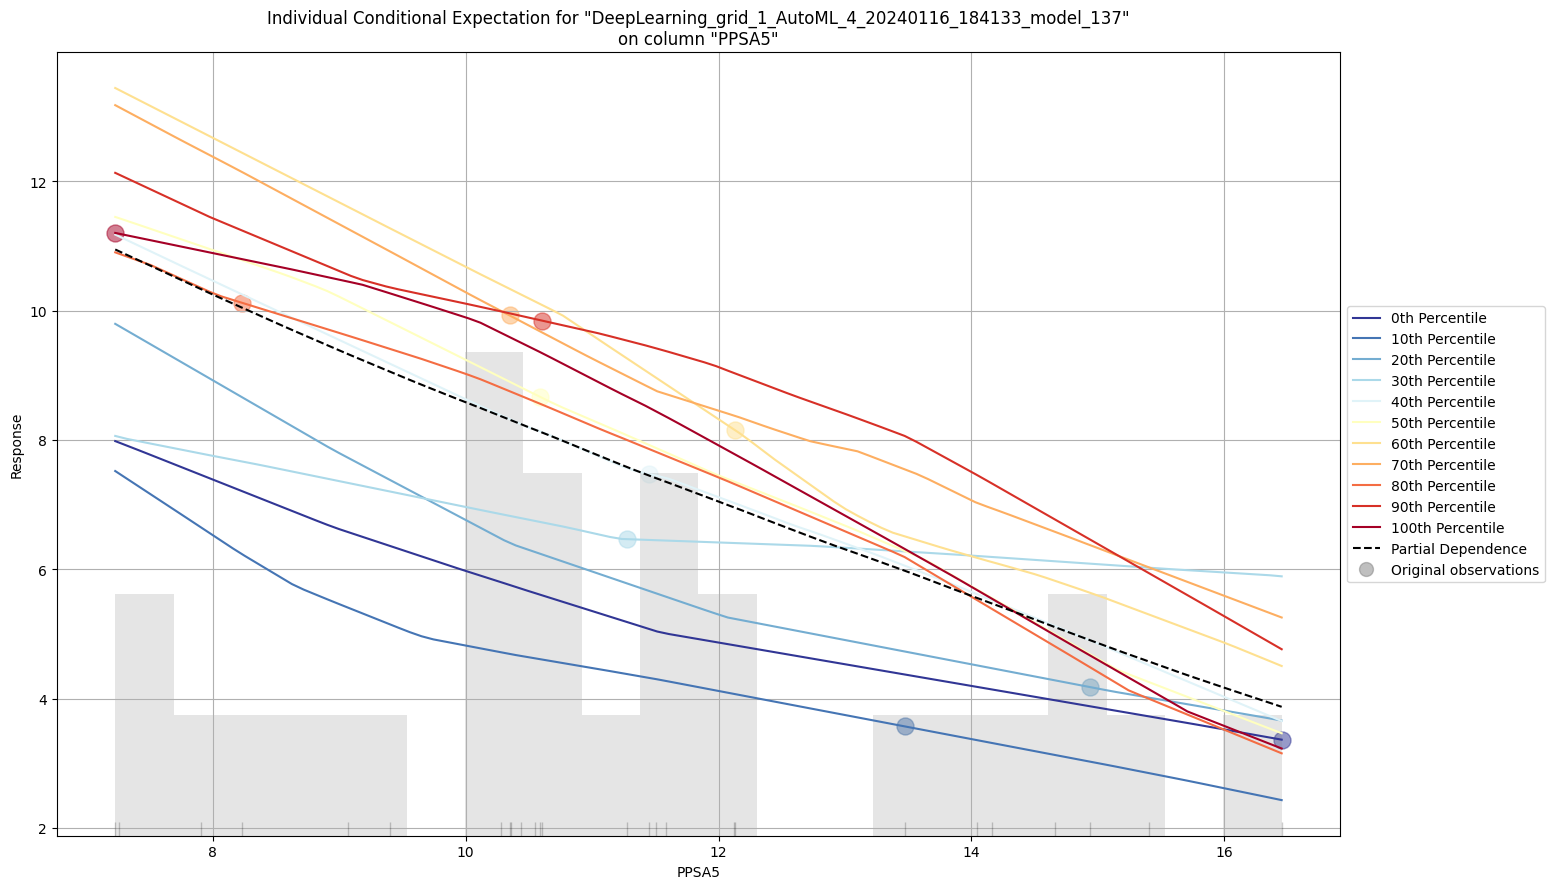

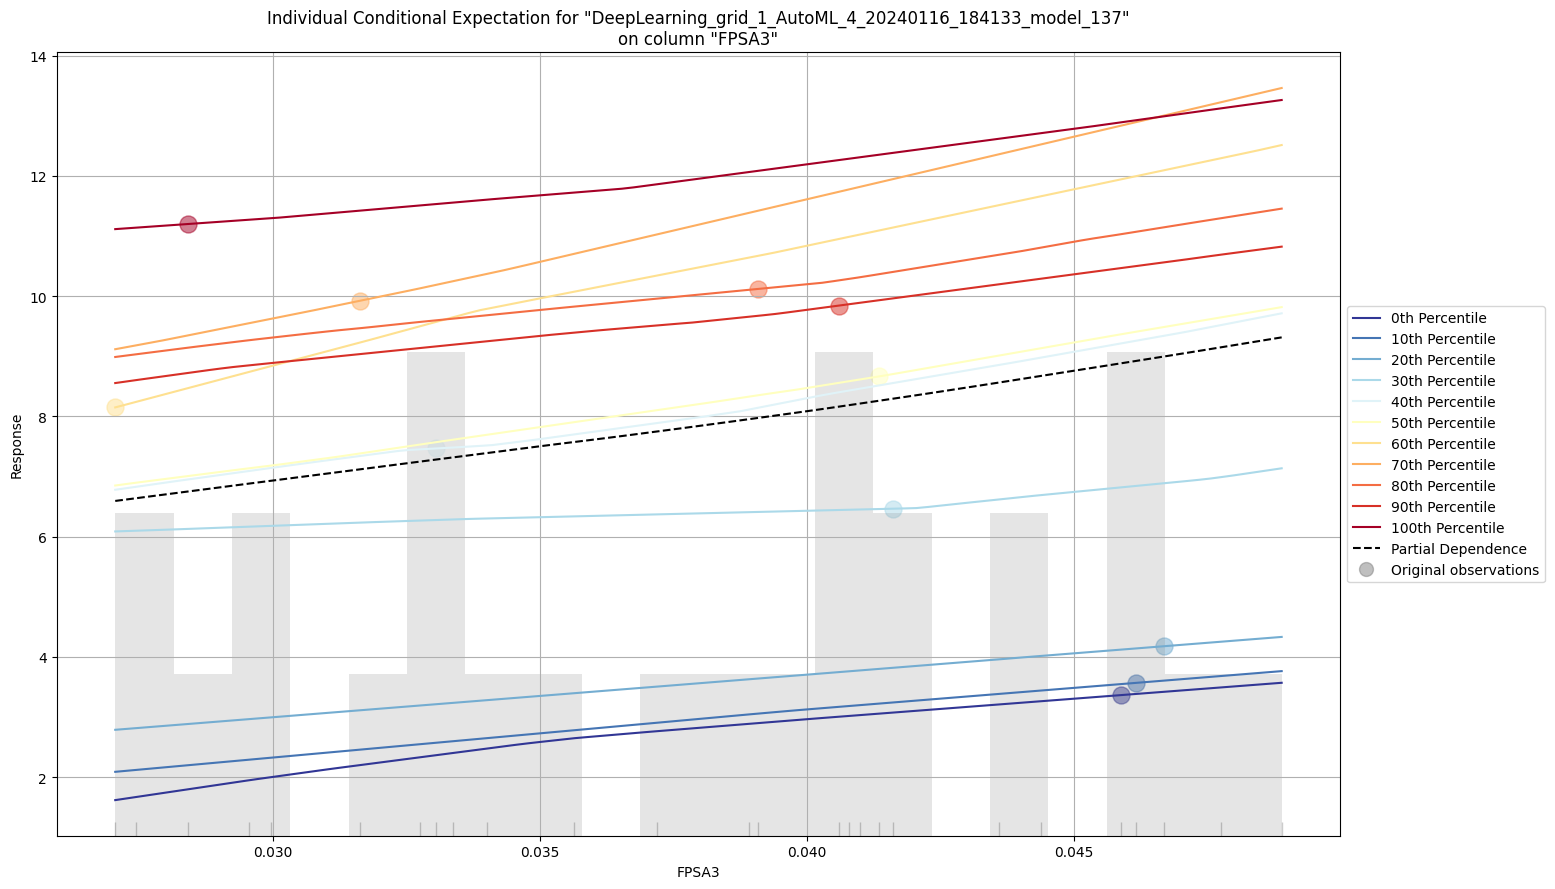

KeyboardInterrupt: 

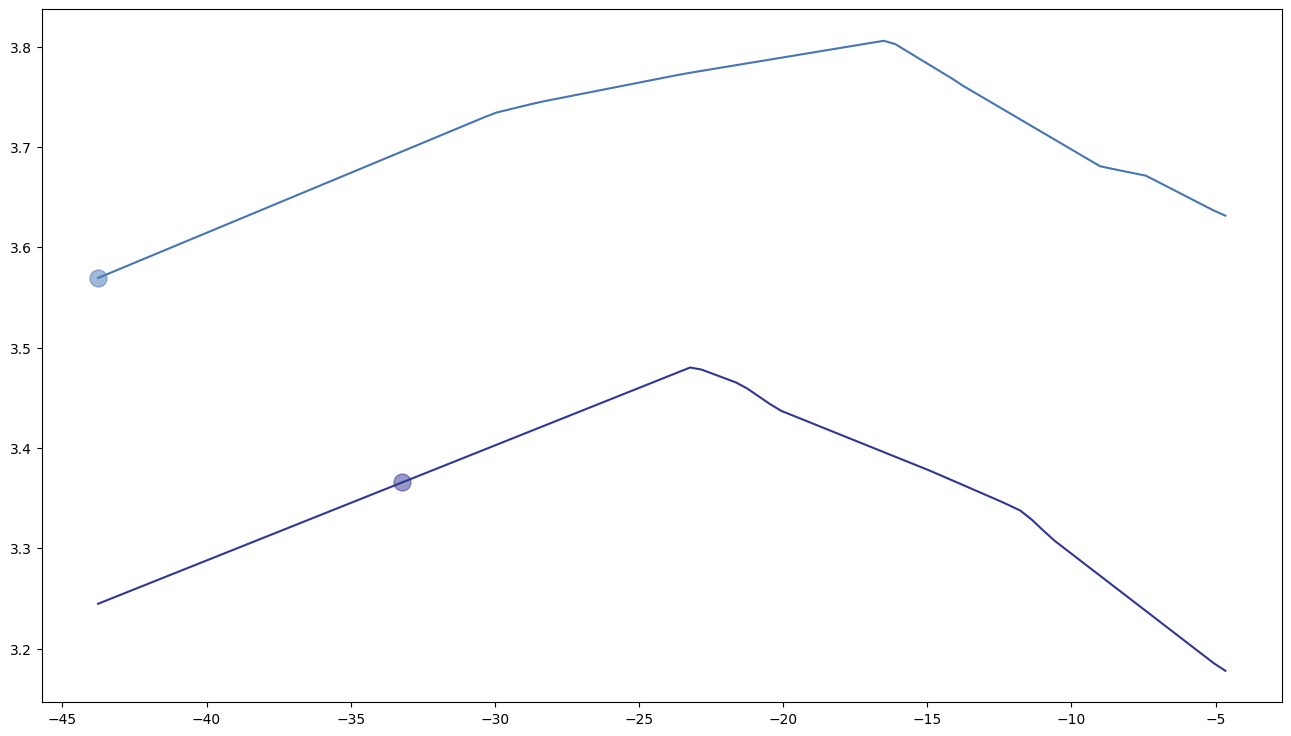

In [7]:
best_model = aml.get_best_model()

best_model.explain(test)

In [10]:
best_model = aml.get_best_model()

importance = best_model.varimp(test)

Text(0.5, 0, 'Percent')

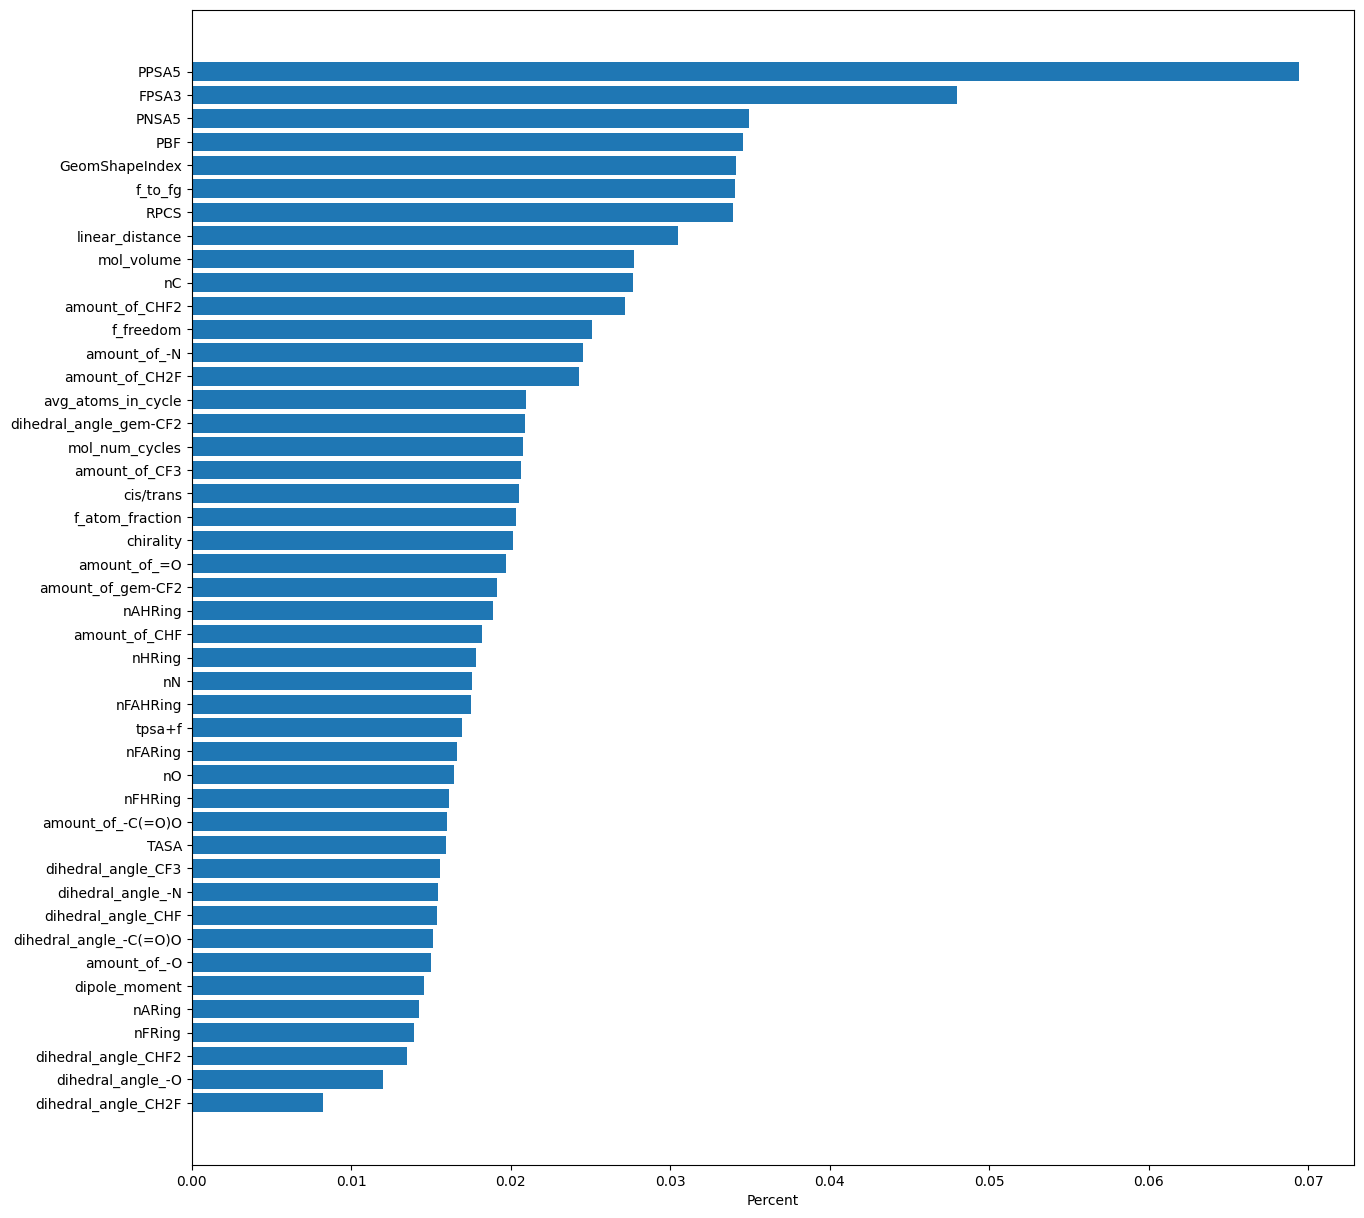

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 15))
ax.barh(importance['variable'][:][::-1], importance['percentage'][:][::-1])
ax.set_xlabel('Percent')

Independent molecules explain

In [30]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 21.0.1+12-LTS-29, mixed mode, sharing)
  Starting server from C:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\38066\AppData\Local\Temp\tmpl5b0i2dp
  JVM stdout: C:\Users\38066\AppData\Local\Temp\tmpl5b0i2dp\h2o_38066_started_from_python.out
  JVM stderr: C:\Users\38066\AppData\Local\Temp\tmpl5b0i2dp\h2o_38066_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Kiev
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,27 days
H2O_cluster_name:,H2O_from_python_38066_40ca5m
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.952 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [31]:
MODEL_PATH = r'C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part\h2o_model\models\pKa\best_model\DeepLearning_grid_1_AutoML_4_20240116_184133_model_137'

model = h2o.load_model(MODEL_PATH)

train = h2o.import_file(r"C:\work\DrugDiscovery\main_git\XAI_Chem\data\H2O_Auto_ML_cv\train_pKa_data.csv")
test = h2o.import_file(r"C:\work\DrugDiscovery\main_git\XAI_Chem\data\H2O_Auto_ML_cv\test_pKa_data.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [33]:
preds = model.predict(test)
true = test.as_data_frame()['pKa']
predicted_values = preds.as_data_frame()['predict']

calculate_metrics(true, predicted_values)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'mse': 0.34, 'mae': 0.486, 'r_score': 0.946}

In [34]:
MODEL_PATH = r'C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part\h2o_model\models\logP\GLM_model\GLM_1_AutoML_3_20240116_165713'
logP_model = h2o.load_model(MODEL_PATH)

In [35]:
logP_model.show()

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_3_20240116_165713


GLM Model: summary
    family    link      regularization              lambda_search                                                              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------  -------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.09642 )  nlambda = 30, lambda.max = 40.26, lambda.min = 0.09642, lambda.1se = 0.25  45                            45                             20                      AutoML_3_20240116_165713_training_train_logP_data3.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.04185132924807834
RMSE: 0.20457597426892127
MAE: 0.1595860885688494
RMSLE: 0.07538385172674733
Mean Residual Deviance: 0.04185132924807834
R^2: 0.8664962392837994
Null degrees of freedom: 141
Residual degrees of freedom: 96
Null deviance: 44.514766635379374
Residual deviance: 5.942888753227124
AIC: 46.32283914030474

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.06908181802334144
RMSE: 0.2628342025371535
MAE: 0.20030377674274136
RMSLE: 0.09517440069013447
Mean Residual Deviance: 0.06908181802334144
R^2: 0.7796322681040839
Null degrees of freedom: 141
Residual degrees of freedom: 96
Null deviance: 46.19977446292901
Residual deviance: 9.809618159314486
AIC: 117.4886968374957

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid
----------------------  ---------  -----------  ------------  ------------
mae                     0.19925    0.00142486   0.200258      0.198243
mean_residual_deviance  0.0691493  0.00558171   0.0730962     0.0652024
mse                     0.0691493  0.00558171   0.0730962     0.0652024
null_deviance           23.0999    4.38031      20.0025       26.1972
r2                      0.774997   0.0301277    0.753694      0.796301
residual_deviance       4.88197    0.288242     4.67815       5.08579
rmse                    0.262855   0.0106175    0.270363      0.255348
rmsle                   0.094496   0.000193226  0.0946326     0.0943594

Scoring History: 
    timestamp            duration    iteration    lambda    predictors    deviance_train    alpha    iterations    training_rmse        training_deviance    training_mae        training_r2
--  -------------------  ----------  -----------  --------  ------------  ----------------  -------  ------------  -------------------  -------------------  ------------------  ------------------
    2024-01-16 16:57:13  0.000 sec   1            ,4Е2      45            0.258577          0
    2024-01-16 16:57:13  0.000 sec   2            ,29Е2     46            0.243646          0
    2024-01-16 16:57:13  0.001 sec   3            ,21Е2     46            0.226358          0
    2024-01-16 16:57:13  0.001 sec   4            ,16Е2     46            0.207099          0
    2024-01-16 16:57:13  0.001 sec   5            ,11Е2     46            0.186521          0
    2024-01-16 16:57:13  0.001 sec   6            ,82Е1     46            0.165456          0
    2024-01-16 16:57:13  0.001 sec   7            ,6Е1      46            0.144806          0
    2024-01-16 16:57:13  0.002 sec   8            ,44Е1     46            0.125417          0
    2024-01-16 16:57:13  0.002 sec   9            ,32Е1     46            0.107941          0
    2024-01-16 16:57:13  0.002 sec   10           ,23Е1     46            0.0928495         0
    2024-01-16 16:57:13  0.003 sec   11           ,17Е1     46            0.0803408         0
    2024-01-16 16:57:13  0.003 sec   12           ,12Е1     46            0.0703654         0
    2024-01-16 16

**stacked explanations**

In [6]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb = lb.as_data_frame()

c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [7]:
best_model = aml.get_best_model()

models_amount = 10
models_left, model_index = 10, 0
total_ranks = {var_name:0 for var_name in best_model.varimp(test)['variable']}
total_importance = {var_name:0 for var_name in best_model.varimp(test)['variable']}
while models_left > 0:
    
    model_name = lb['model_id'][model_index]
    model_index += 1

    print(model_name.lower())
    if 'ensemble' in model_name.lower():
        continue
    model = h2o.get_model(model_name)

    importance_df = model.varimp(test)
    for rank, row in importance_df.iterrows():
        if rank == 0:
            print(f"The most important feature: {row['variable']}, percentage: {row['percentage']}")
        total_ranks[row['variable']] += (rank + 1) / models_amount
        total_importance[row['variable']] += row['percentage'] / models_amount

    models_left -= 1
    # break

deeplearning_grid_1_automl_1_20240117_205744_model_27
The most important feature: PPSA5, percentage: 0.10299025527875948
stackedensemble_bestoffamily_6_automl_1_20240117_205744
deeplearning_grid_1_automl_1_20240117_205744_model_20
The most important feature: PPSA5, percentage: 0.11582527140157725
deeplearning_grid_1_automl_1_20240117_205744_model_15
The most important feature: PPSA5, percentage: 0.13794952347247946
deeplearning_grid_1_automl_1_20240117_205744_model_46
The most important feature: PPSA5, percentage: 0.08072354312644124
stackedensemble_allmodels_6_automl_1_20240117_205744
deeplearning_grid_2_automl_1_20240117_205744_model_9
The most important feature: PPSA5, percentage: 0.06844074757118608
stackedensemble_bestoffamily_3_automl_1_20240117_205744
deeplearning_grid_1_automl_1_20240117_205744_model_37
The most important feature: PPSA5, percentage: 0.08252864198485926
deeplearning_grid_1_automl_1_20240117_205744_model_13
The most important feature: PPSA5, percentage: 0.1154030

Text(0.5, 1.0, 'Percentage importance')

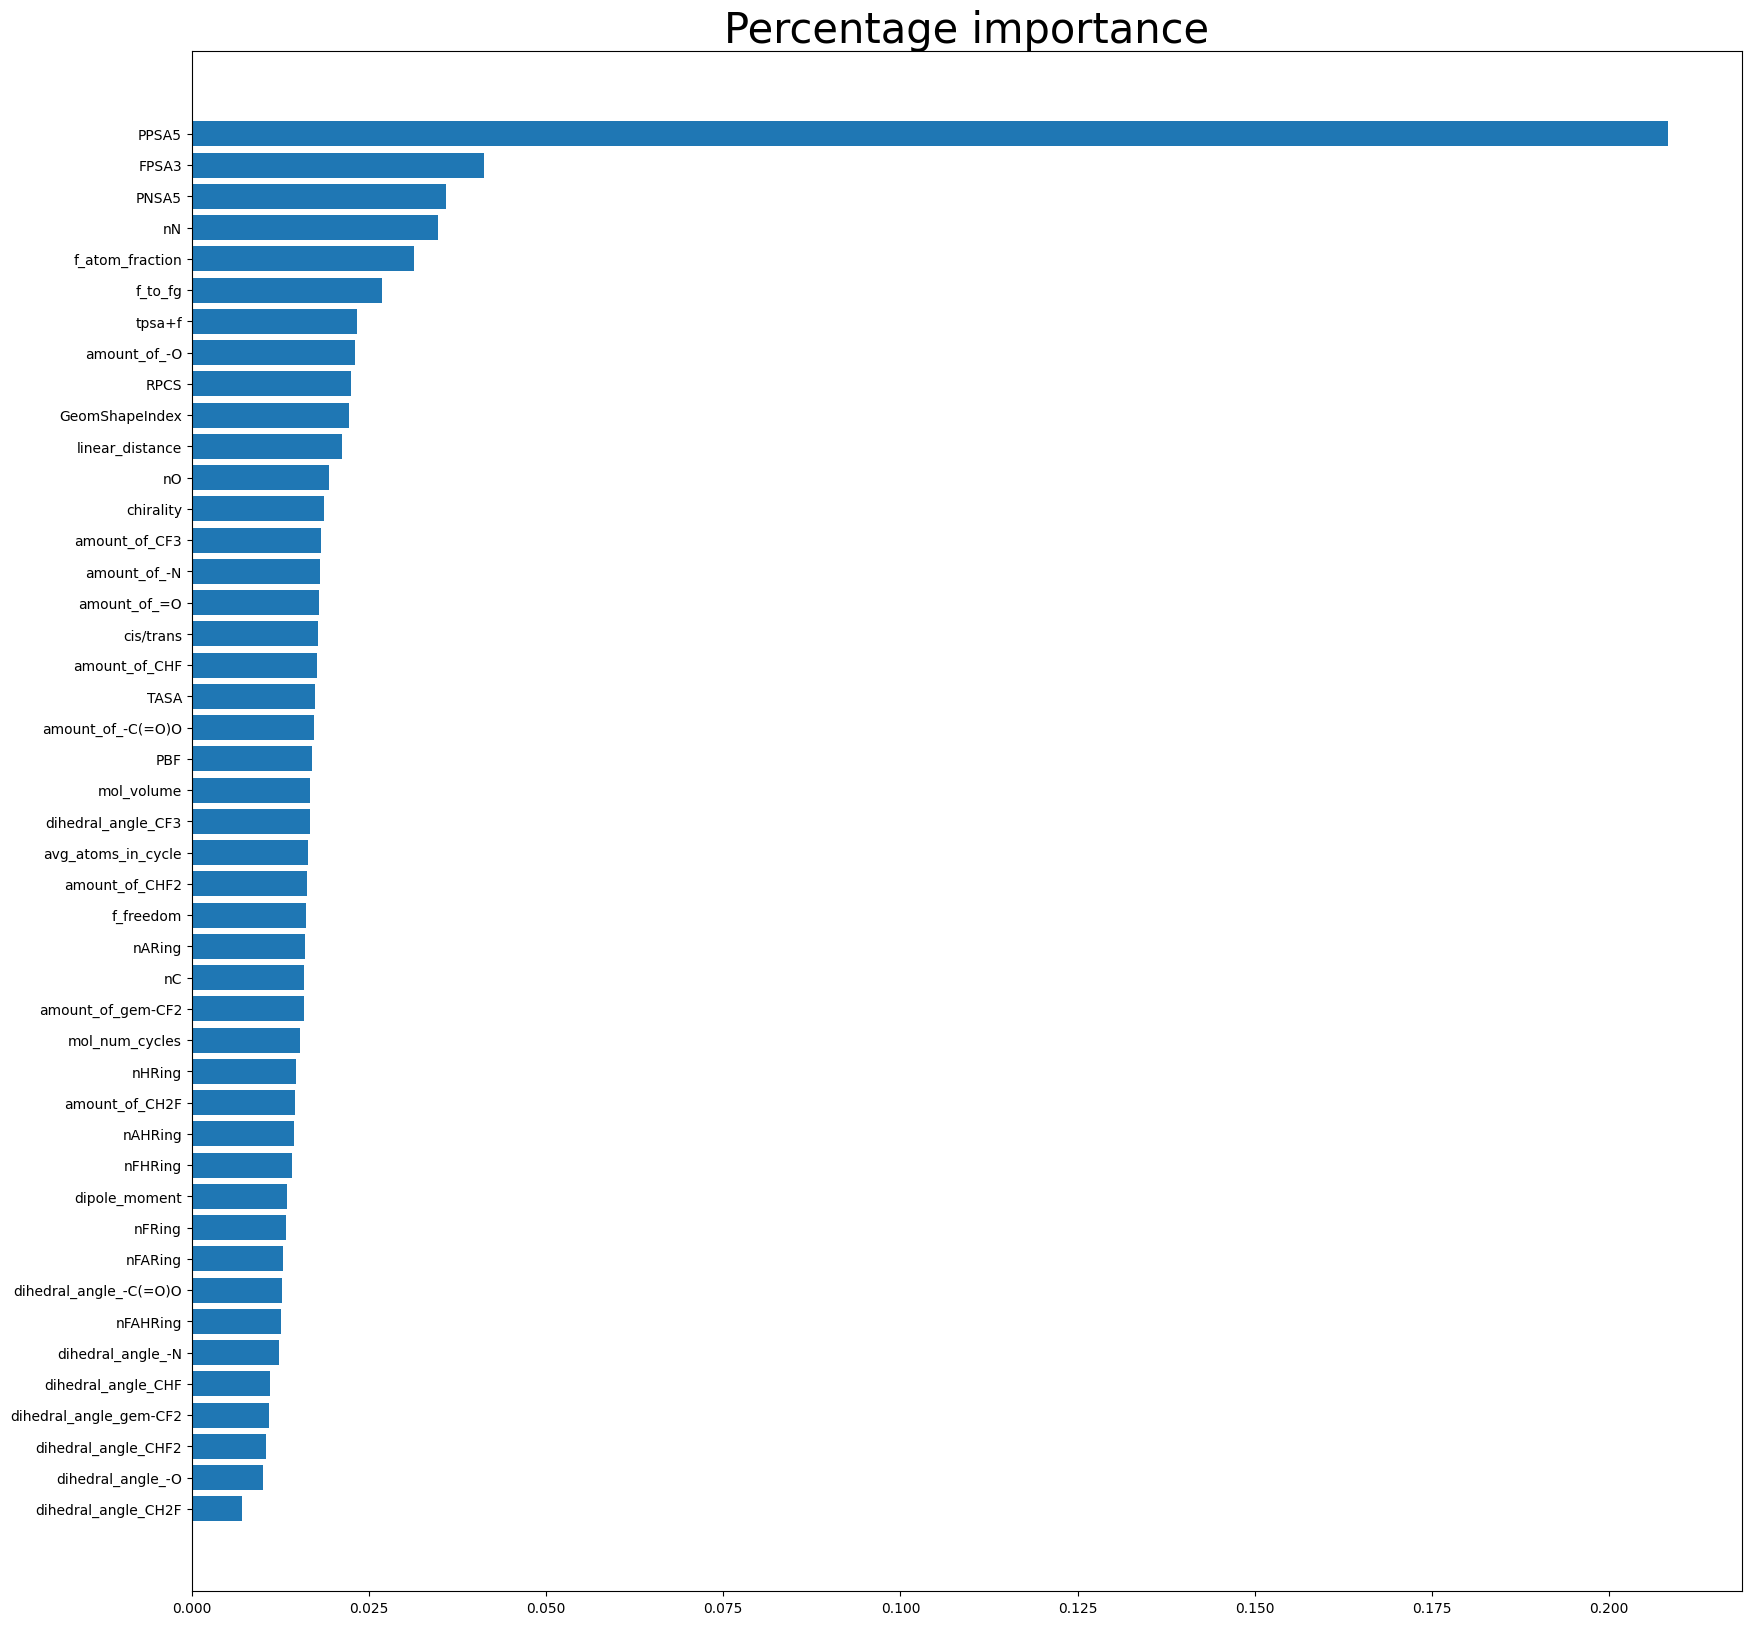

In [8]:
import matplotlib.pyplot as plt
import operator

total_importance = dict(sorted(total_importance.items(), key=operator.itemgetter(1)))

fig, ax = plt.subplots(figsize=(20,20))
ax.barh(list(total_importance.keys()), total_importance.values())
ax.set_title("Percentage importance", fontsize=30)

Text(0.5, 1.0, 'Avg rank')

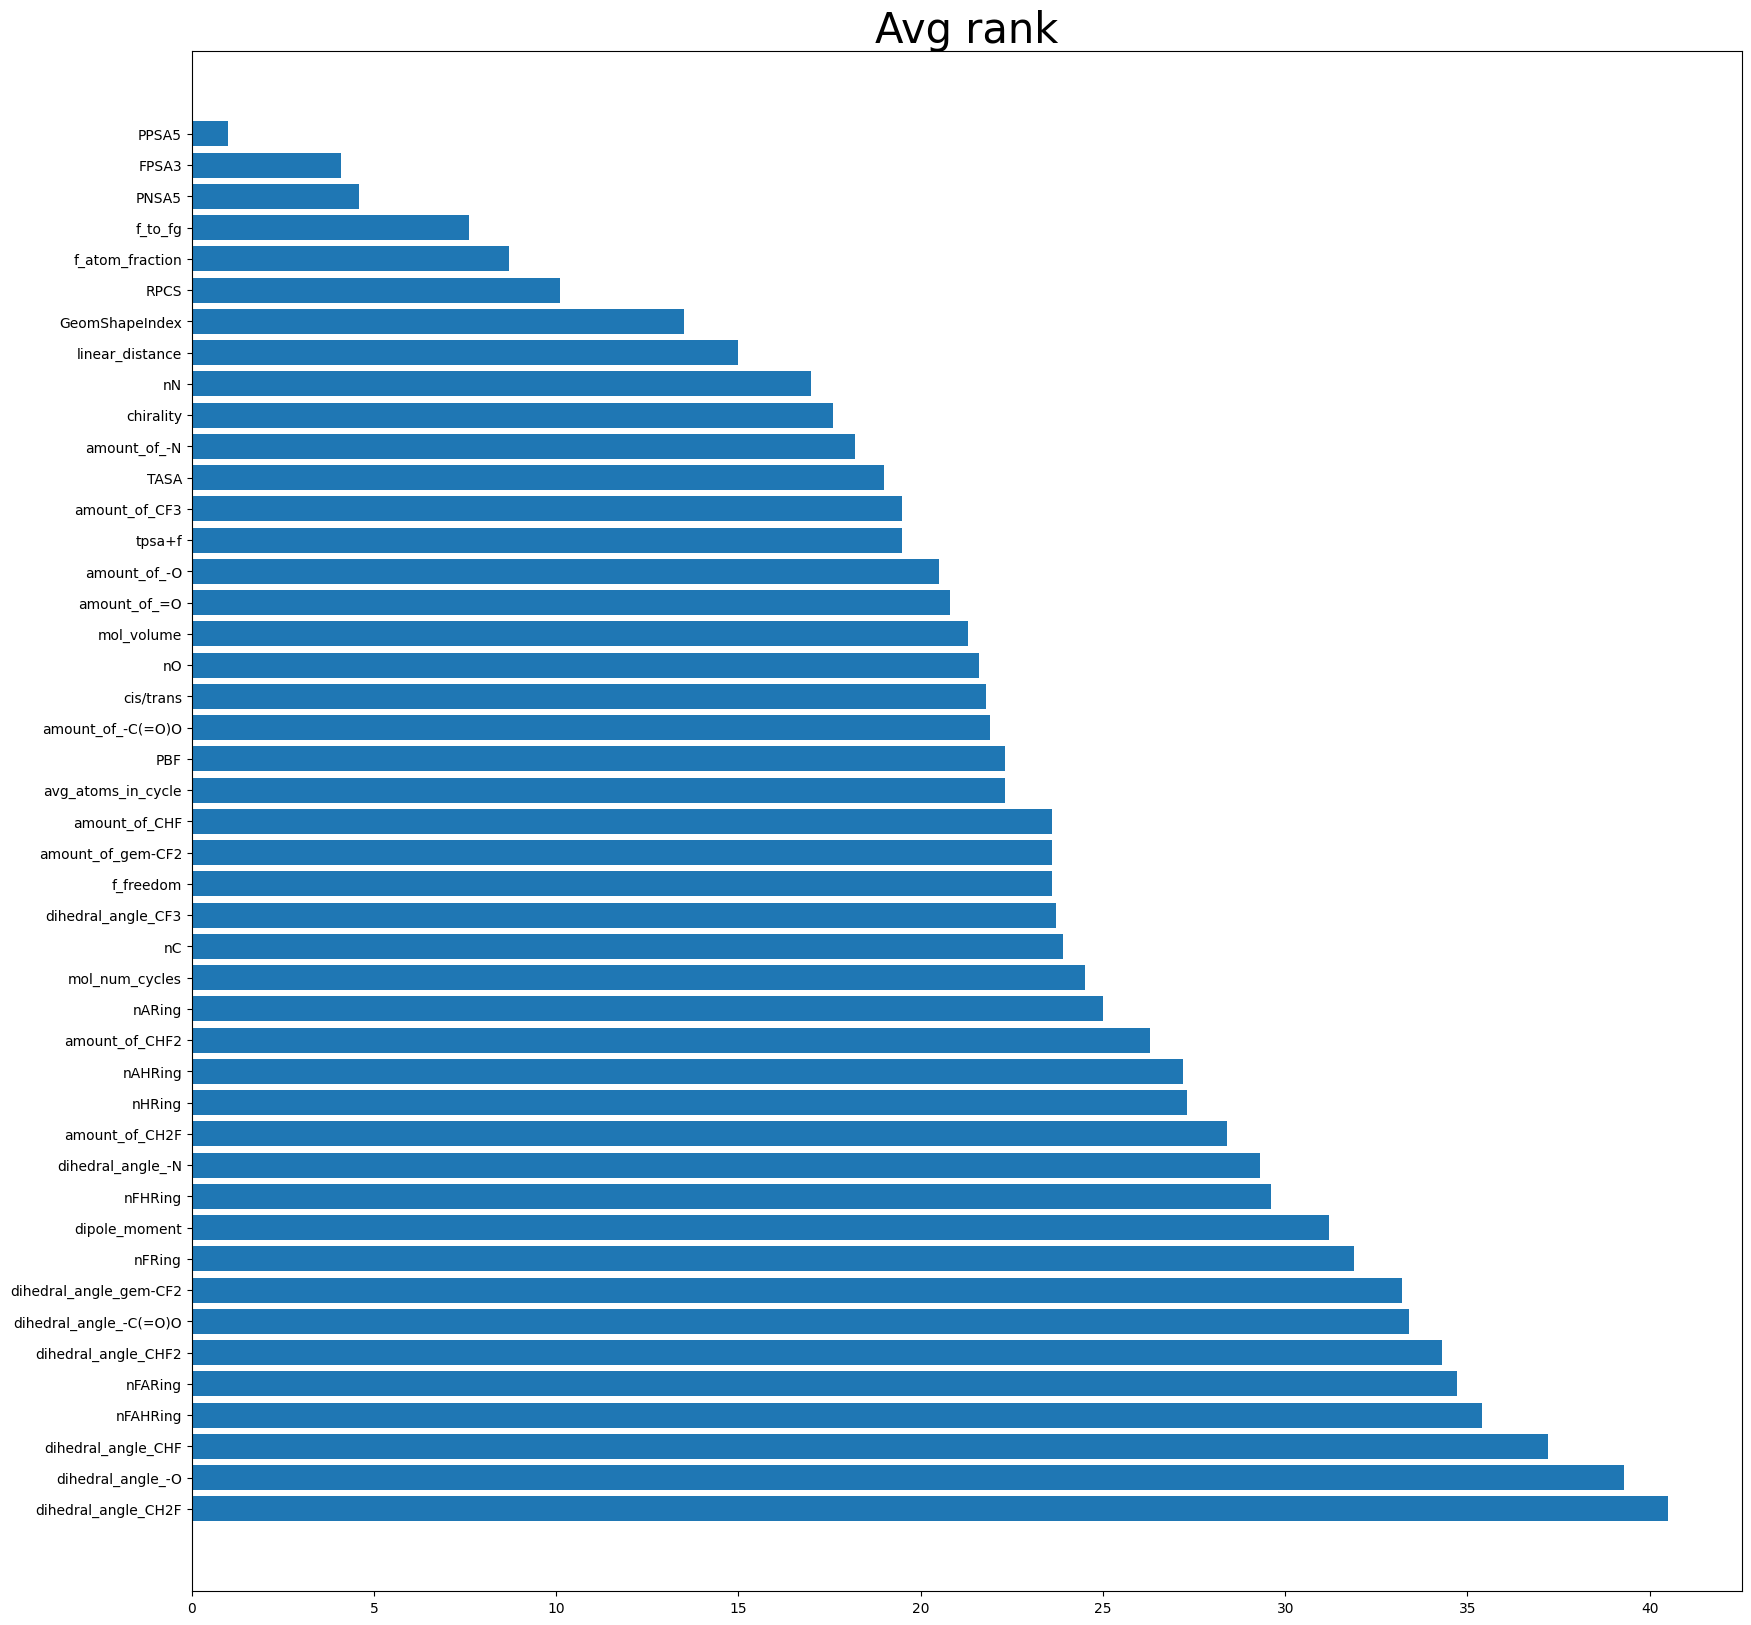

In [9]:
import matplotlib.pyplot as plt
import operator

total_ranks = dict(sorted(total_ranks.items(), key=operator.itemgetter(1)))

fig, ax = plt.subplots(figsize=(20,20))
ax.barh(list(total_ranks.keys())[::-1], list(total_ranks.values())[::-1])
ax.set_title("Avg rank", fontsize=30)

**MOLECULE EXPLANATION**

In [12]:
preds = aml.predict(test)
true = test.as_data_frame()['pKa']
predicted_values = preds.as_data_frame()['predict']

calculate_metrics(true, predicted_values)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'mse': 0.364, 'mae': 0.514, 'r_score': 0.942}

In [17]:
for index in range(len(true)):
    print(f"True: {true[index]}, pred: {predicted_values[index]}")

True: 3.55, pred: 4.473453721143364
True: 3.51, pred: 4.039866389409333
True: 4.02, pred: 4.282913163775168
True: 4.39, pred: 4.940540154273115
True: 4.35, pred: 4.524447825838092
True: 4.18, pred: 4.83956853078315
True: 4.61, pred: 4.5189583570619405
True: 9.12, pred: 8.696536001759558
True: 9.58, pred: 9.163976831223472
True: 8.76, pred: 9.514529100815484
True: 8.1, pred: 8.772635154370166
True: 7.54, pred: 7.359666241881014
True: 9.86, pred: 9.622633374201714
True: 9.57, pred: 8.99884787671933
True: 9.01, pred: 9.014435492984829
True: 7.59, pred: 8.684815456195526
True: 10.36, pred: 9.275719214536393
True: 10.21, pred: 9.366929096639598
True: 10.5, pred: 9.951813726794532
True: 7.11, pred: 7.003077979618245
True: 11.28, pred: 10.30819996376819
True: 9.55, pred: 9.079597902737513
True: 8.97, pred: 8.676261909973041
True: 6.79, pred: 6.61395170136162
True: 11.23, pred: 10.318255086831584
True: 7.2, pred: 6.786042088298548


# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

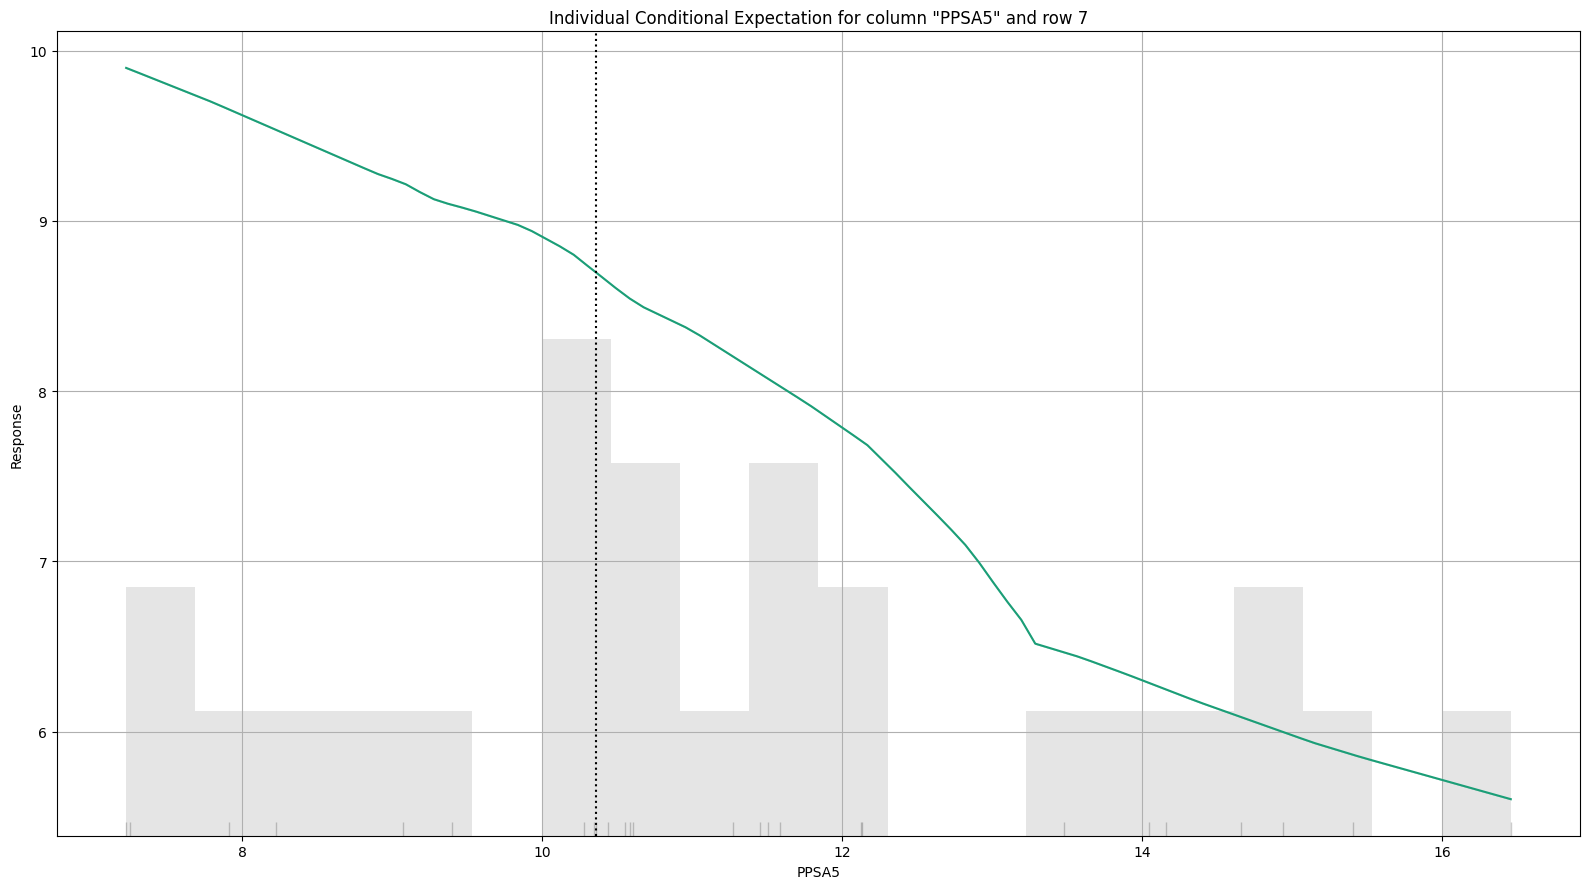

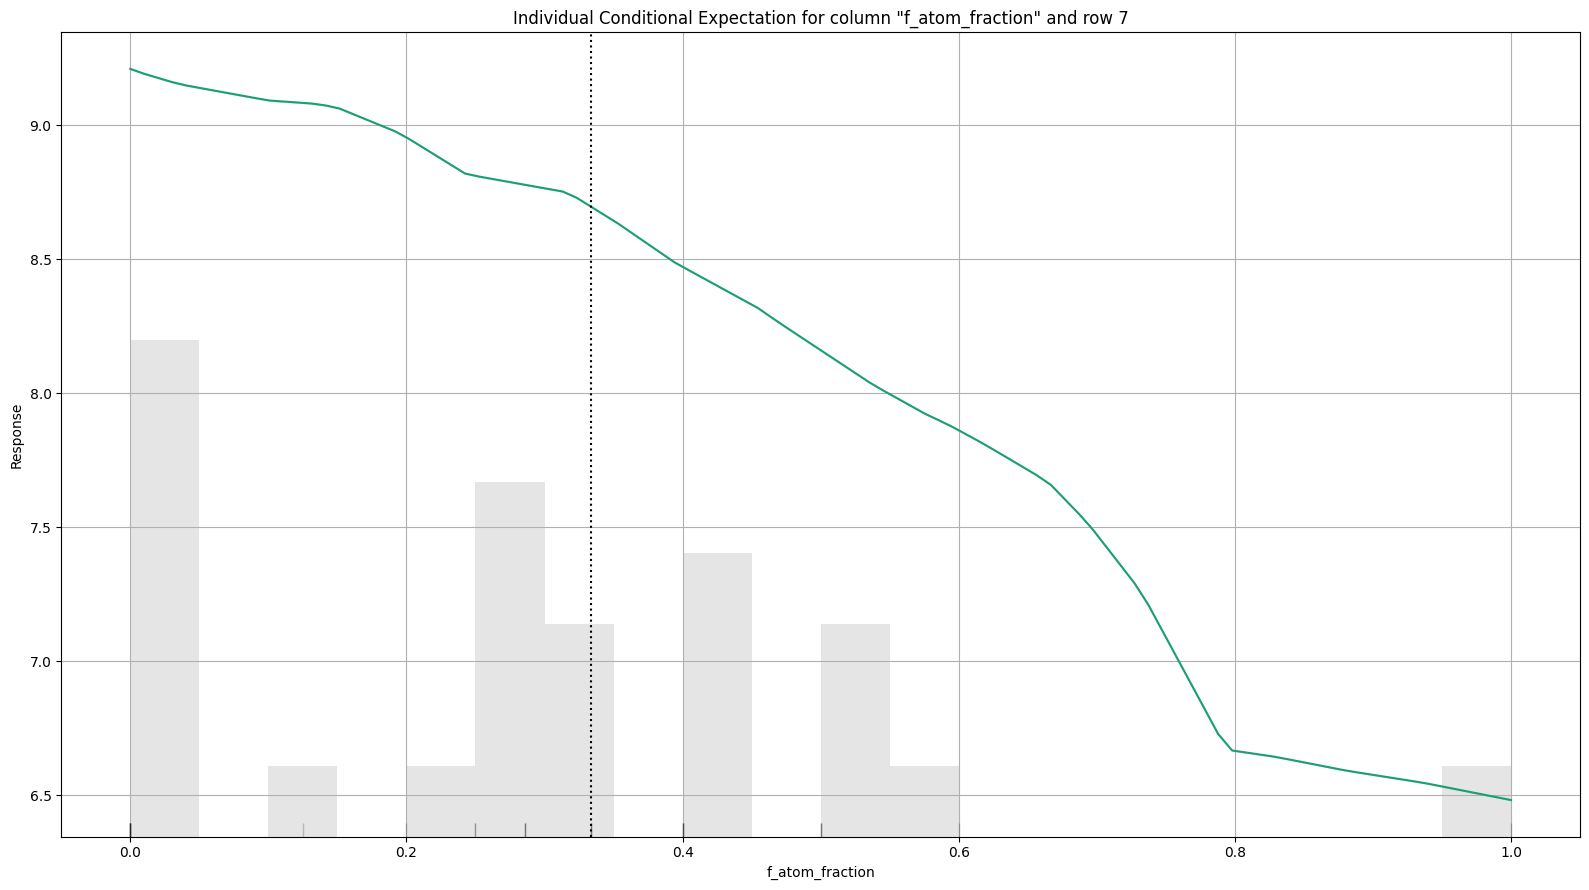

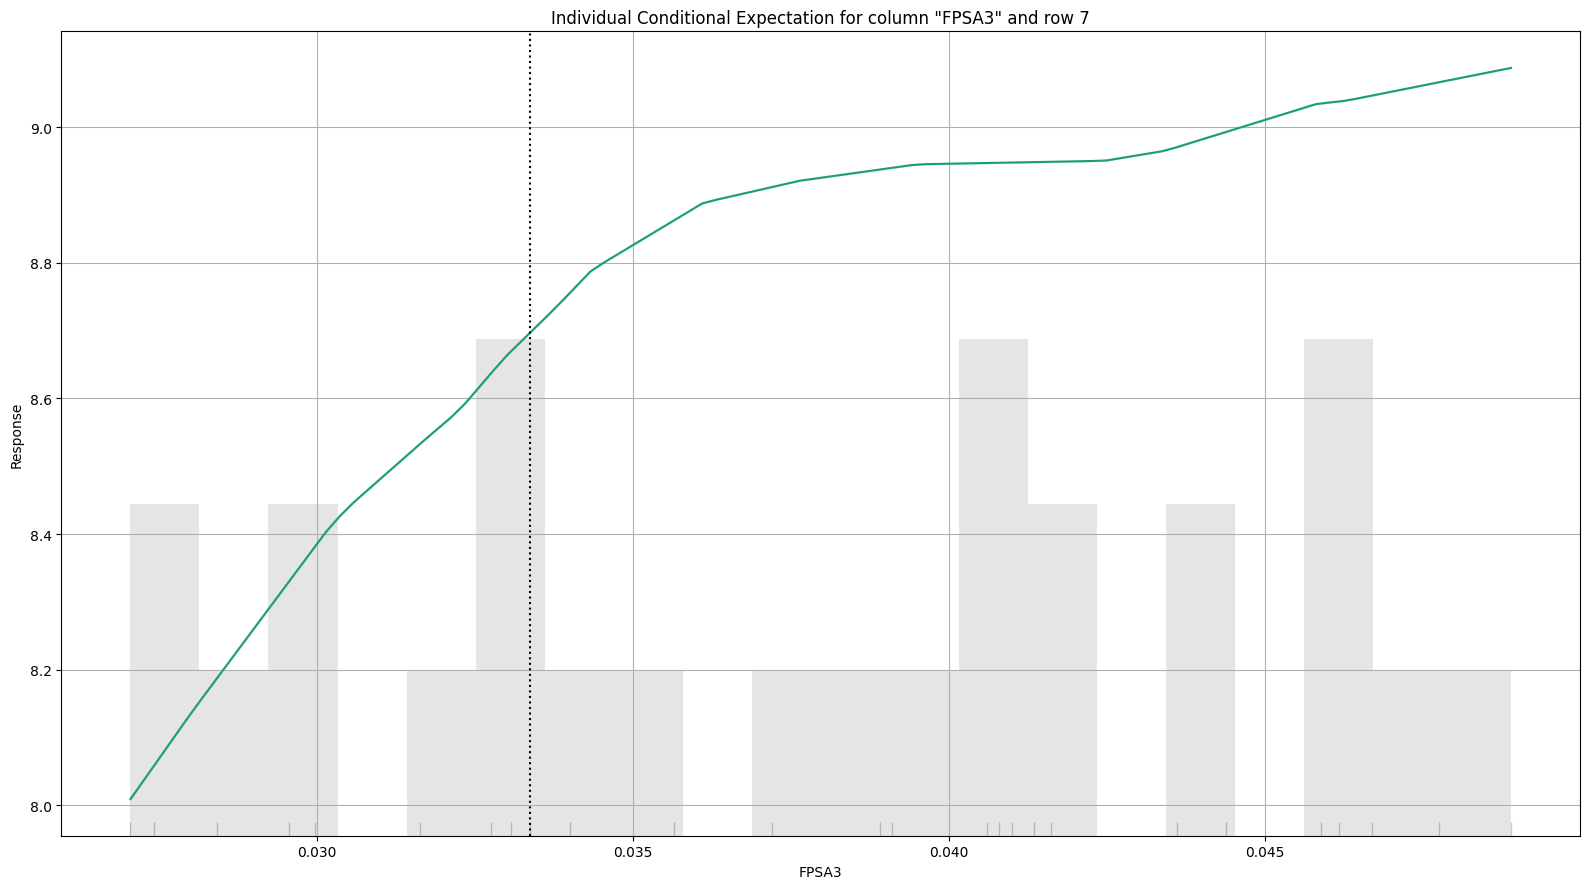

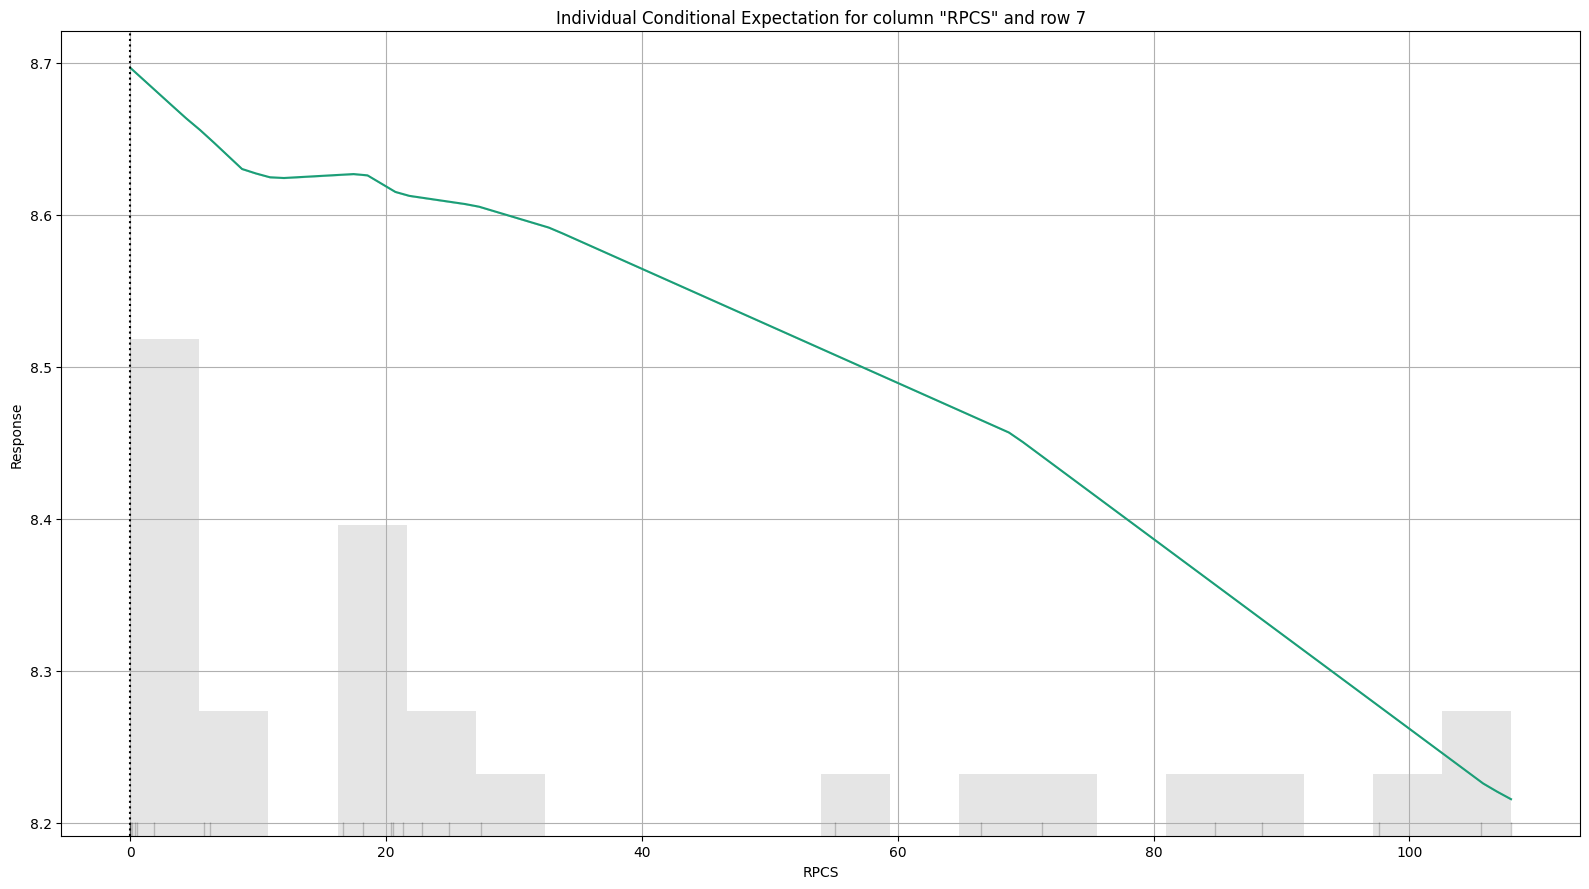

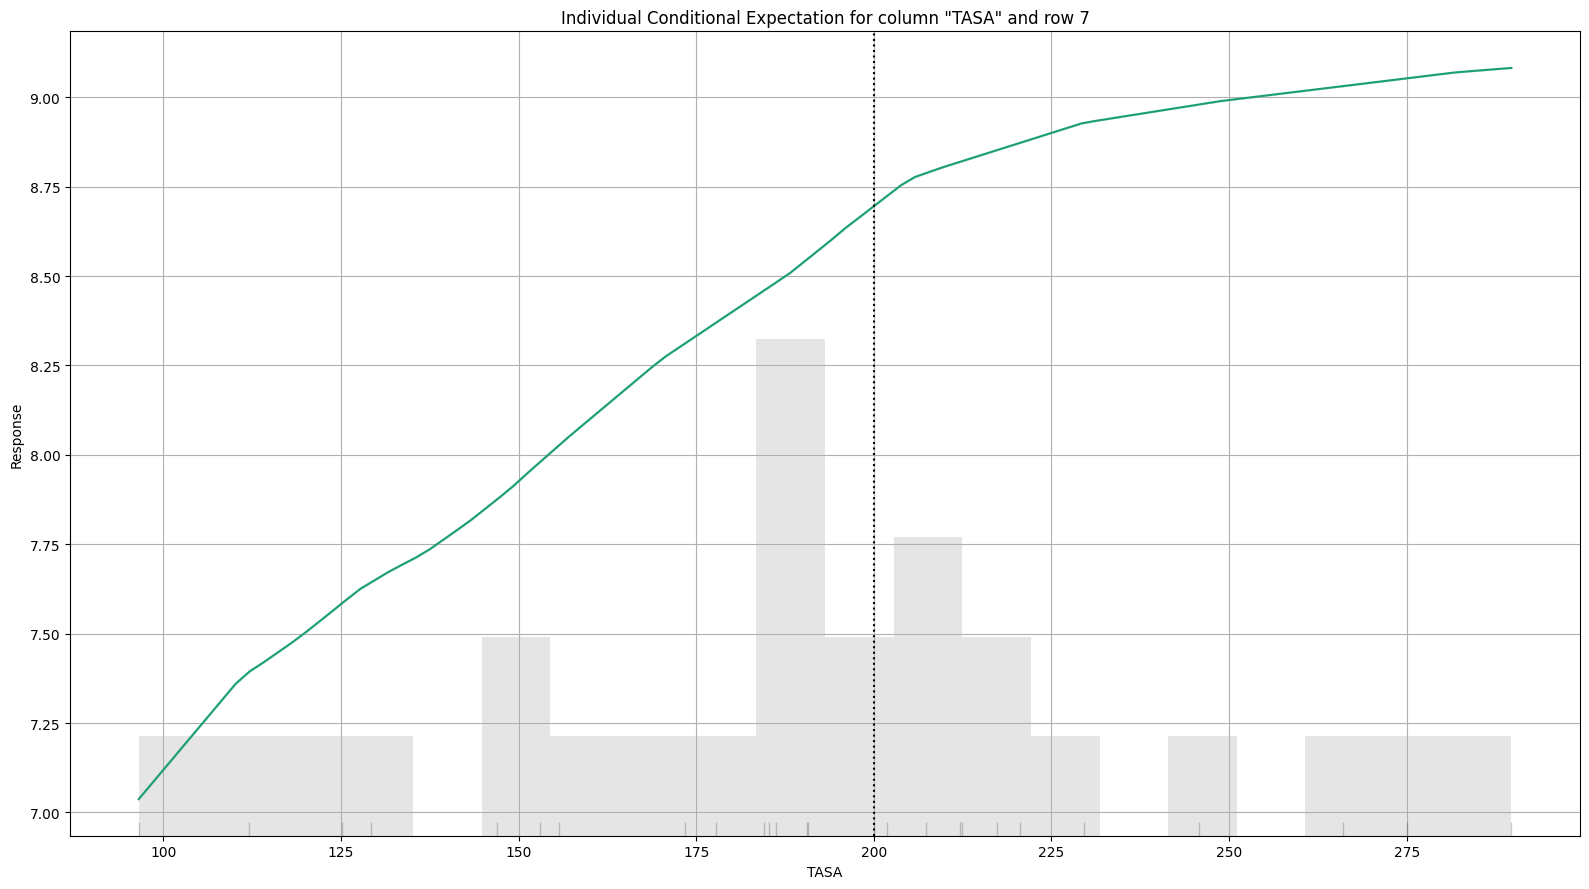

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

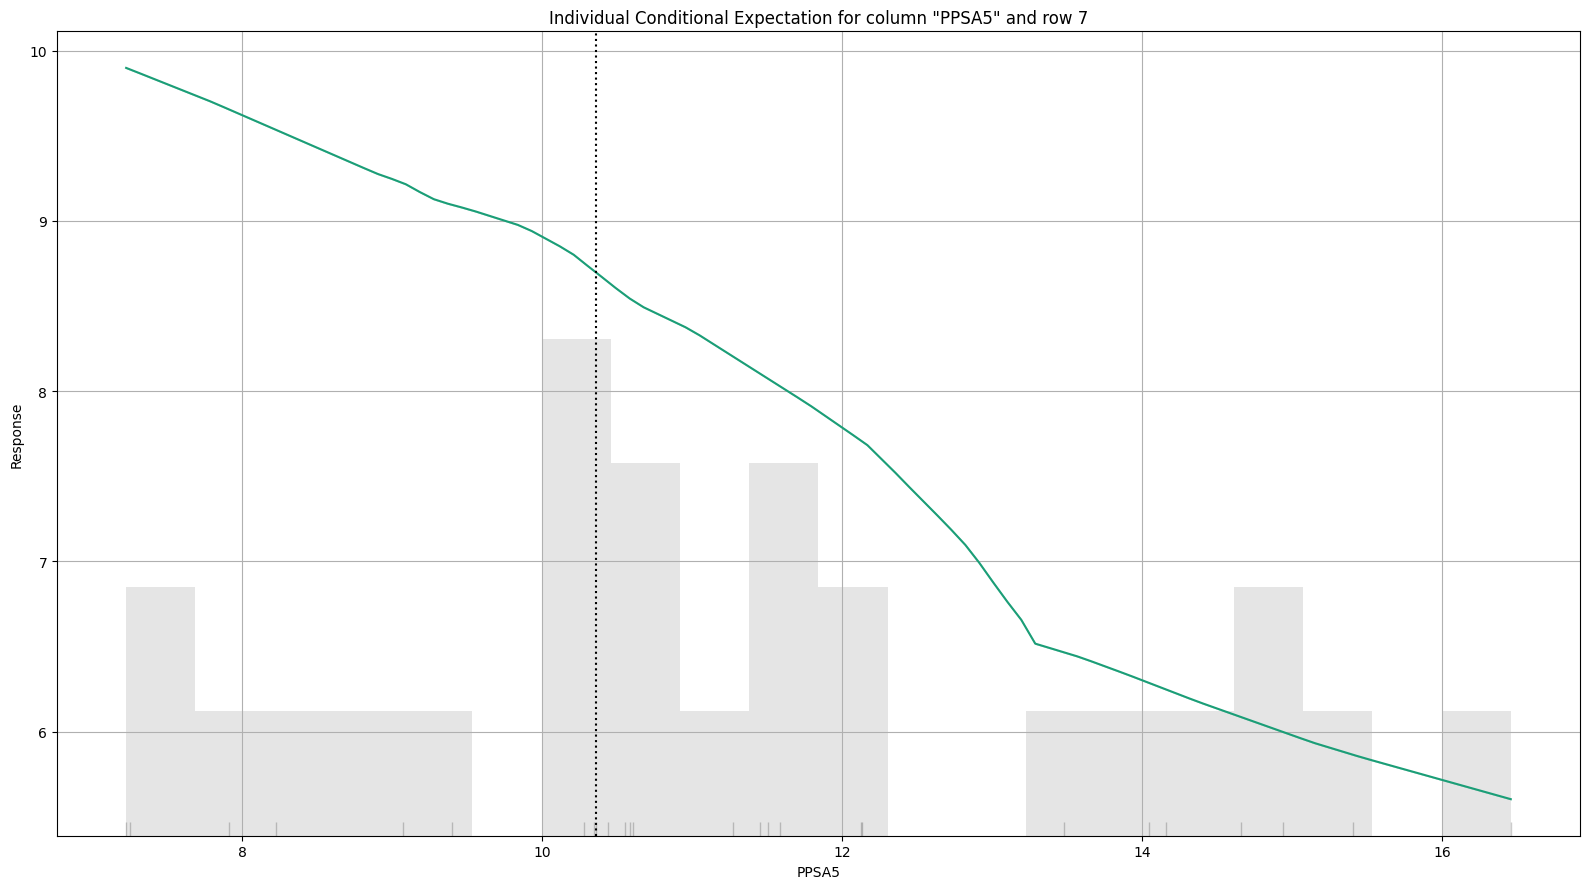

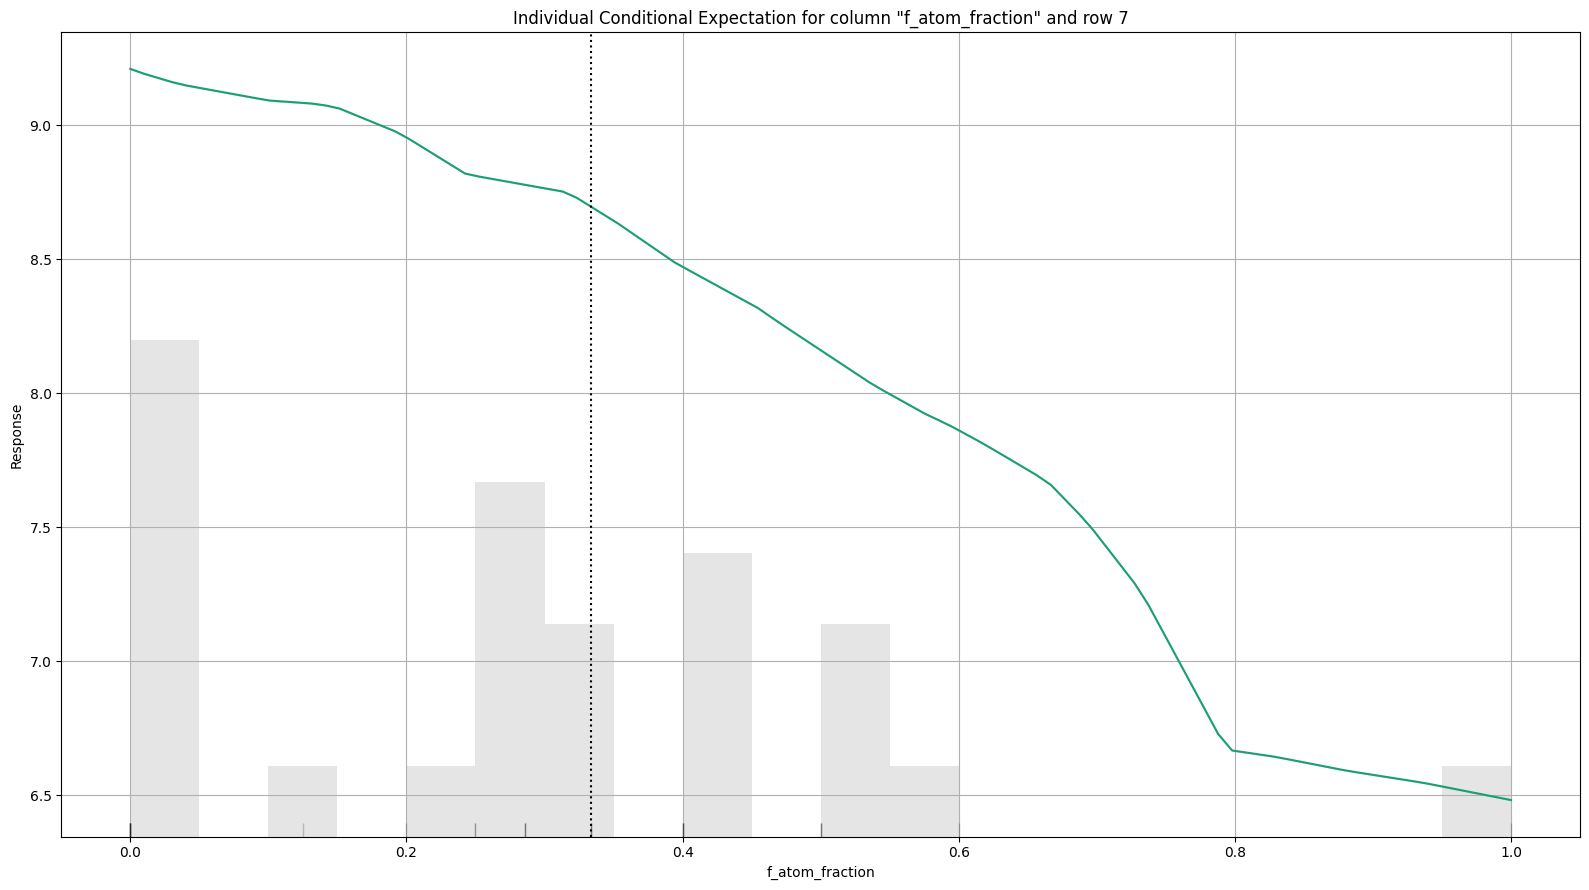

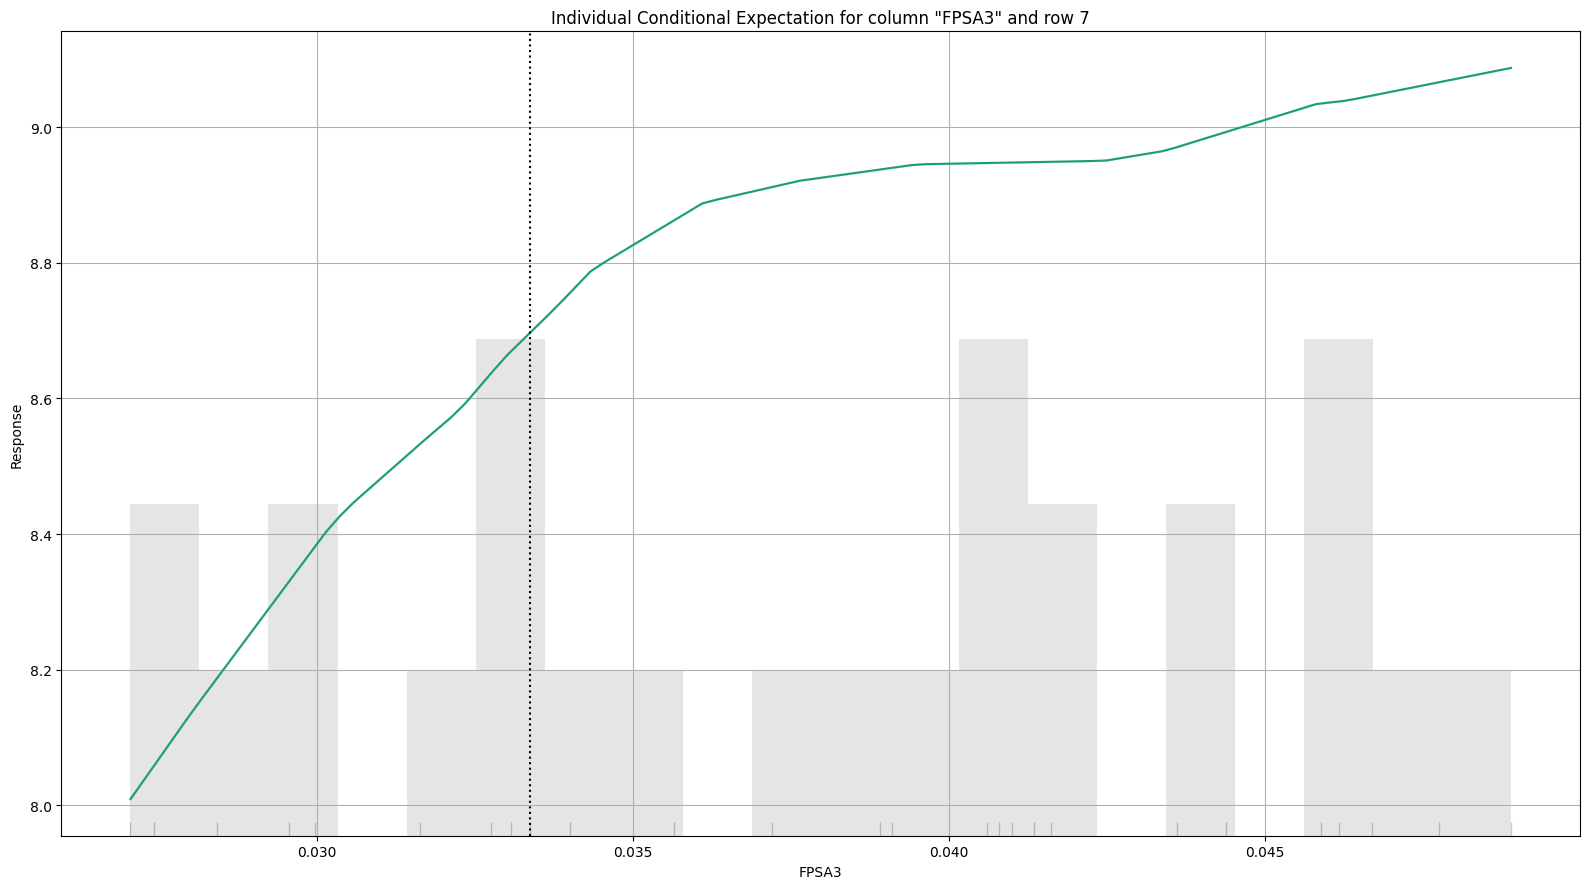

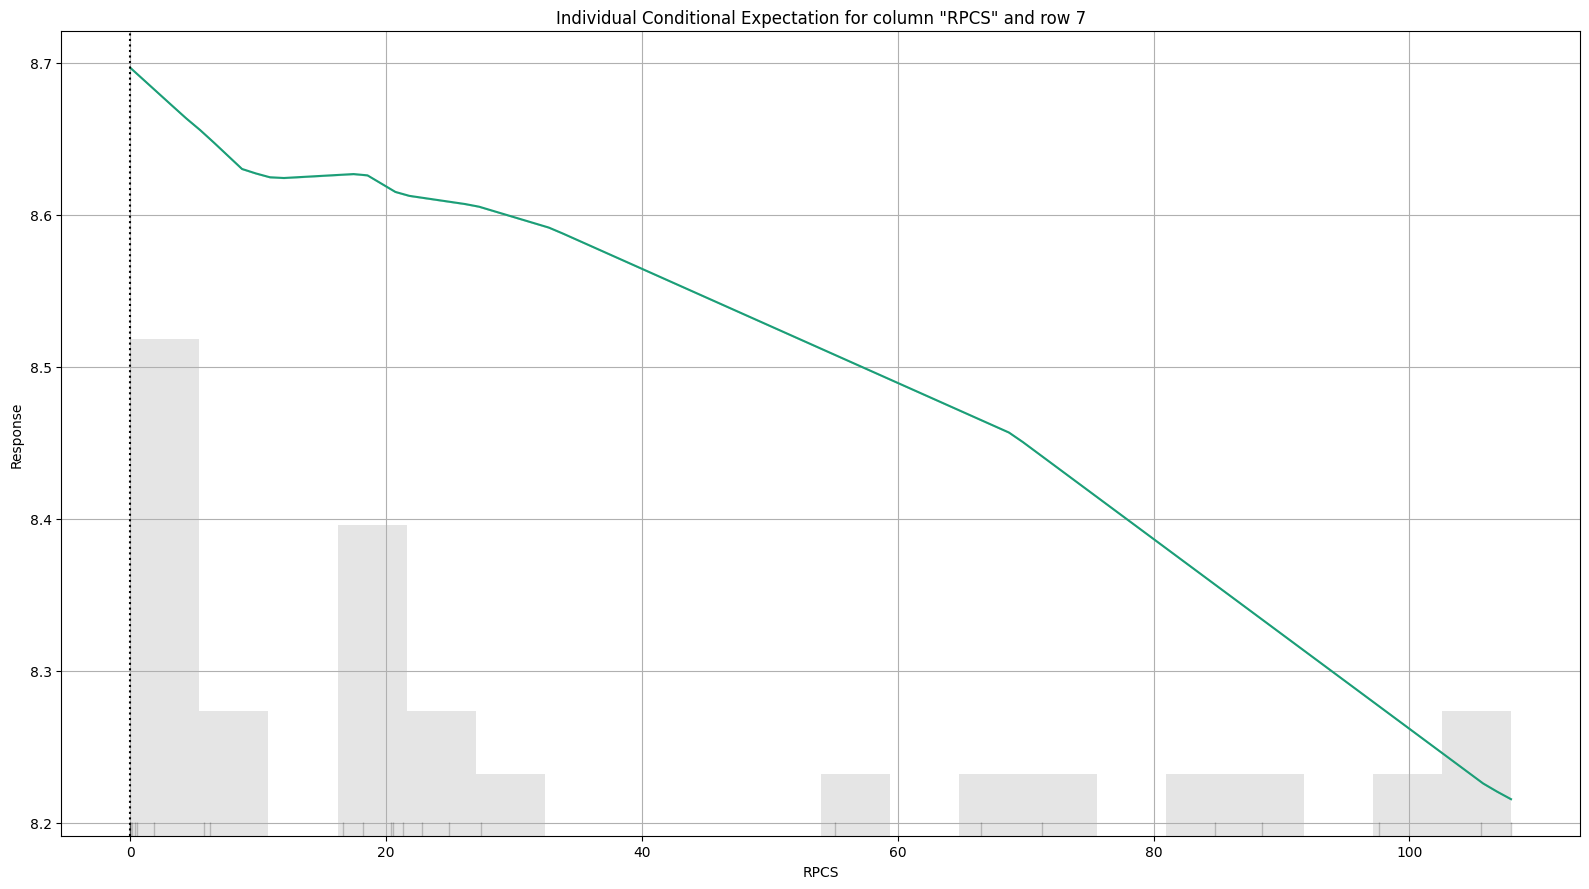

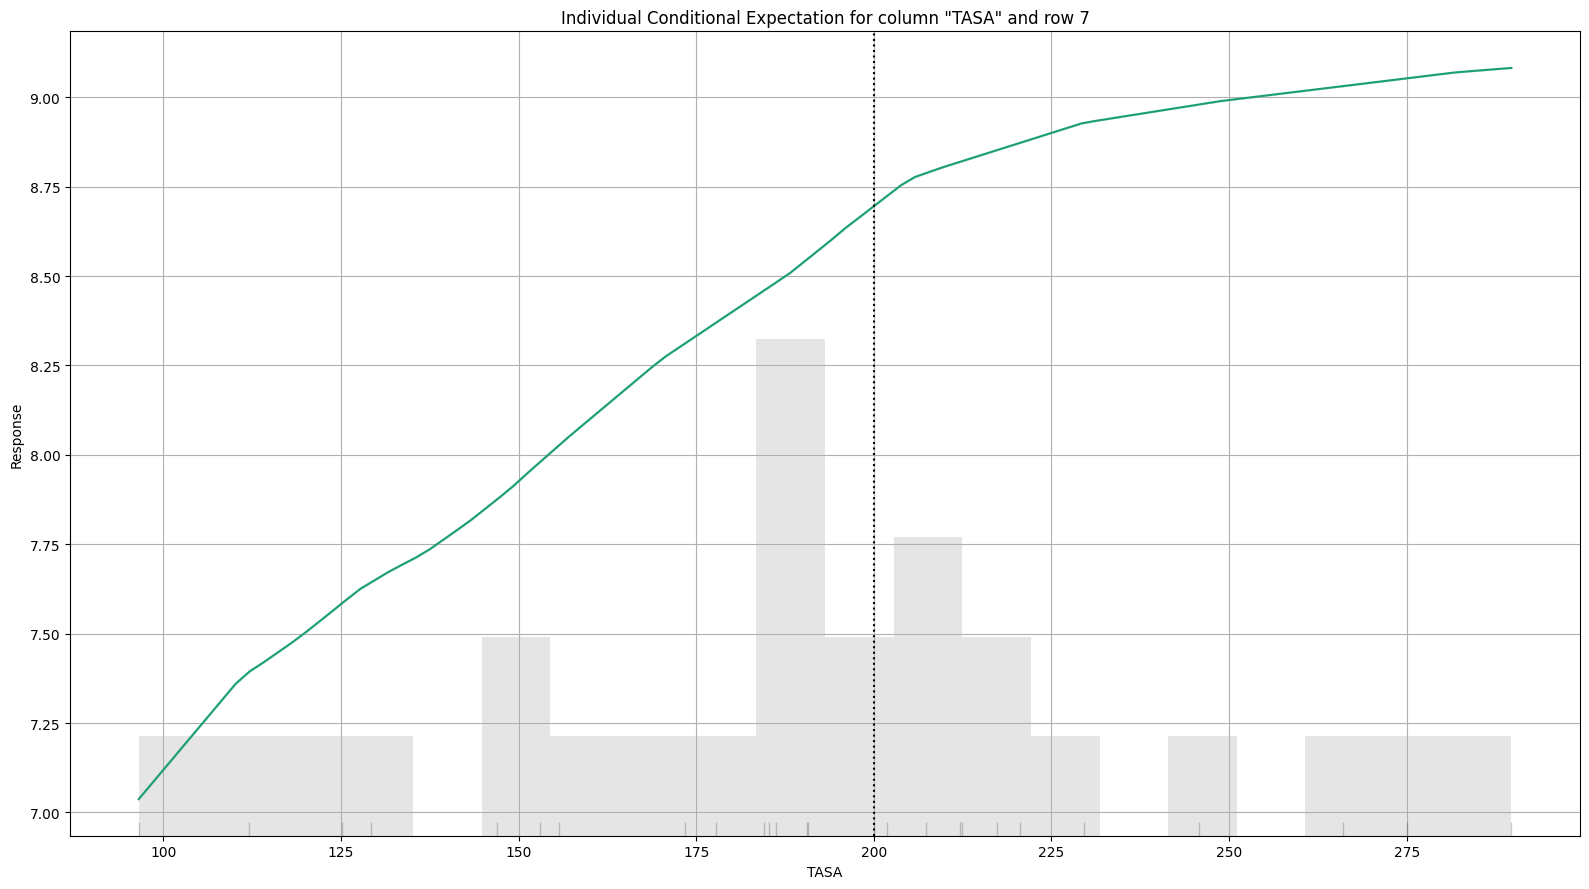

In [21]:
aml.leader.explain_row(test, row_index=7)

TRY TO EXTRACT MODEL FROM ENSEMBLE

In [26]:
best_model = h2o.get_model('StackedEnsemble_BestOfFamily_7_AutoML_1_20240117_153115')

best_model.show()

key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/5
# GBM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),2/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,AUTO
Metalearner nfolds,0
Metalearner fold_column,fold_id


In [16]:
model.shap_summary()

AttributeError: type object 'ModelBase' has no attribute 'shap_summary'